## Worksheet 2

### This is the second set of exercises for the Open Quantum Systems course. As before, there are both analytical and numerical components to the exercises. Each of the 8 questions below is worth 4 marks. 

---

## 1. 
Hamiltonian dynamics for mixed states (in the Schrödinger picture) is described by the von Neumann equation 

$$\frac{{\rm d}\hat{\rho}}{{\rm d}t} = \frac{1}{{\rm i}\hbar}[\hat{H},\hat{\rho}].$$

Suppose that the Hamiltonian comprises a sum of two terms, $\hat{H} = \hat{H}_0 + \hat{H}_1$. The density matrix in the interaction picture generated by $\hat{H}_0$ is defined by

$$ \hat{\rho}_I(t) = \hat{U}^\dagger_0(t,t_0) \hat{\rho}(t) \hat{U}_0(t,t_0),$$

where $\hat{U}_0(t,t_0) = {\rm e}^{-{\rm i}\hat{H}_0 (t-t_0)/\hbar}$, $\hat{\rho}(t)$ is the density matrix in the Schrödinger picture, and $t_0$ is an (arbitrary) initial time. Show that the state in the interaction picture obeys a differential equation of the form

$$ \frac{{\rm d}\hat{\rho}_I}{{\rm d}t} = \frac{1}{{\rm i}\hbar} [\hat{H}_I(t), \hat{\rho}_I(t)],$$

and give an explicit expression for the interaction-picture Hamiltonian $\hat{H}_I(t)$. What is the general solution of this equation in terms of the initial condition $\hat{\rho}(t_0)$?

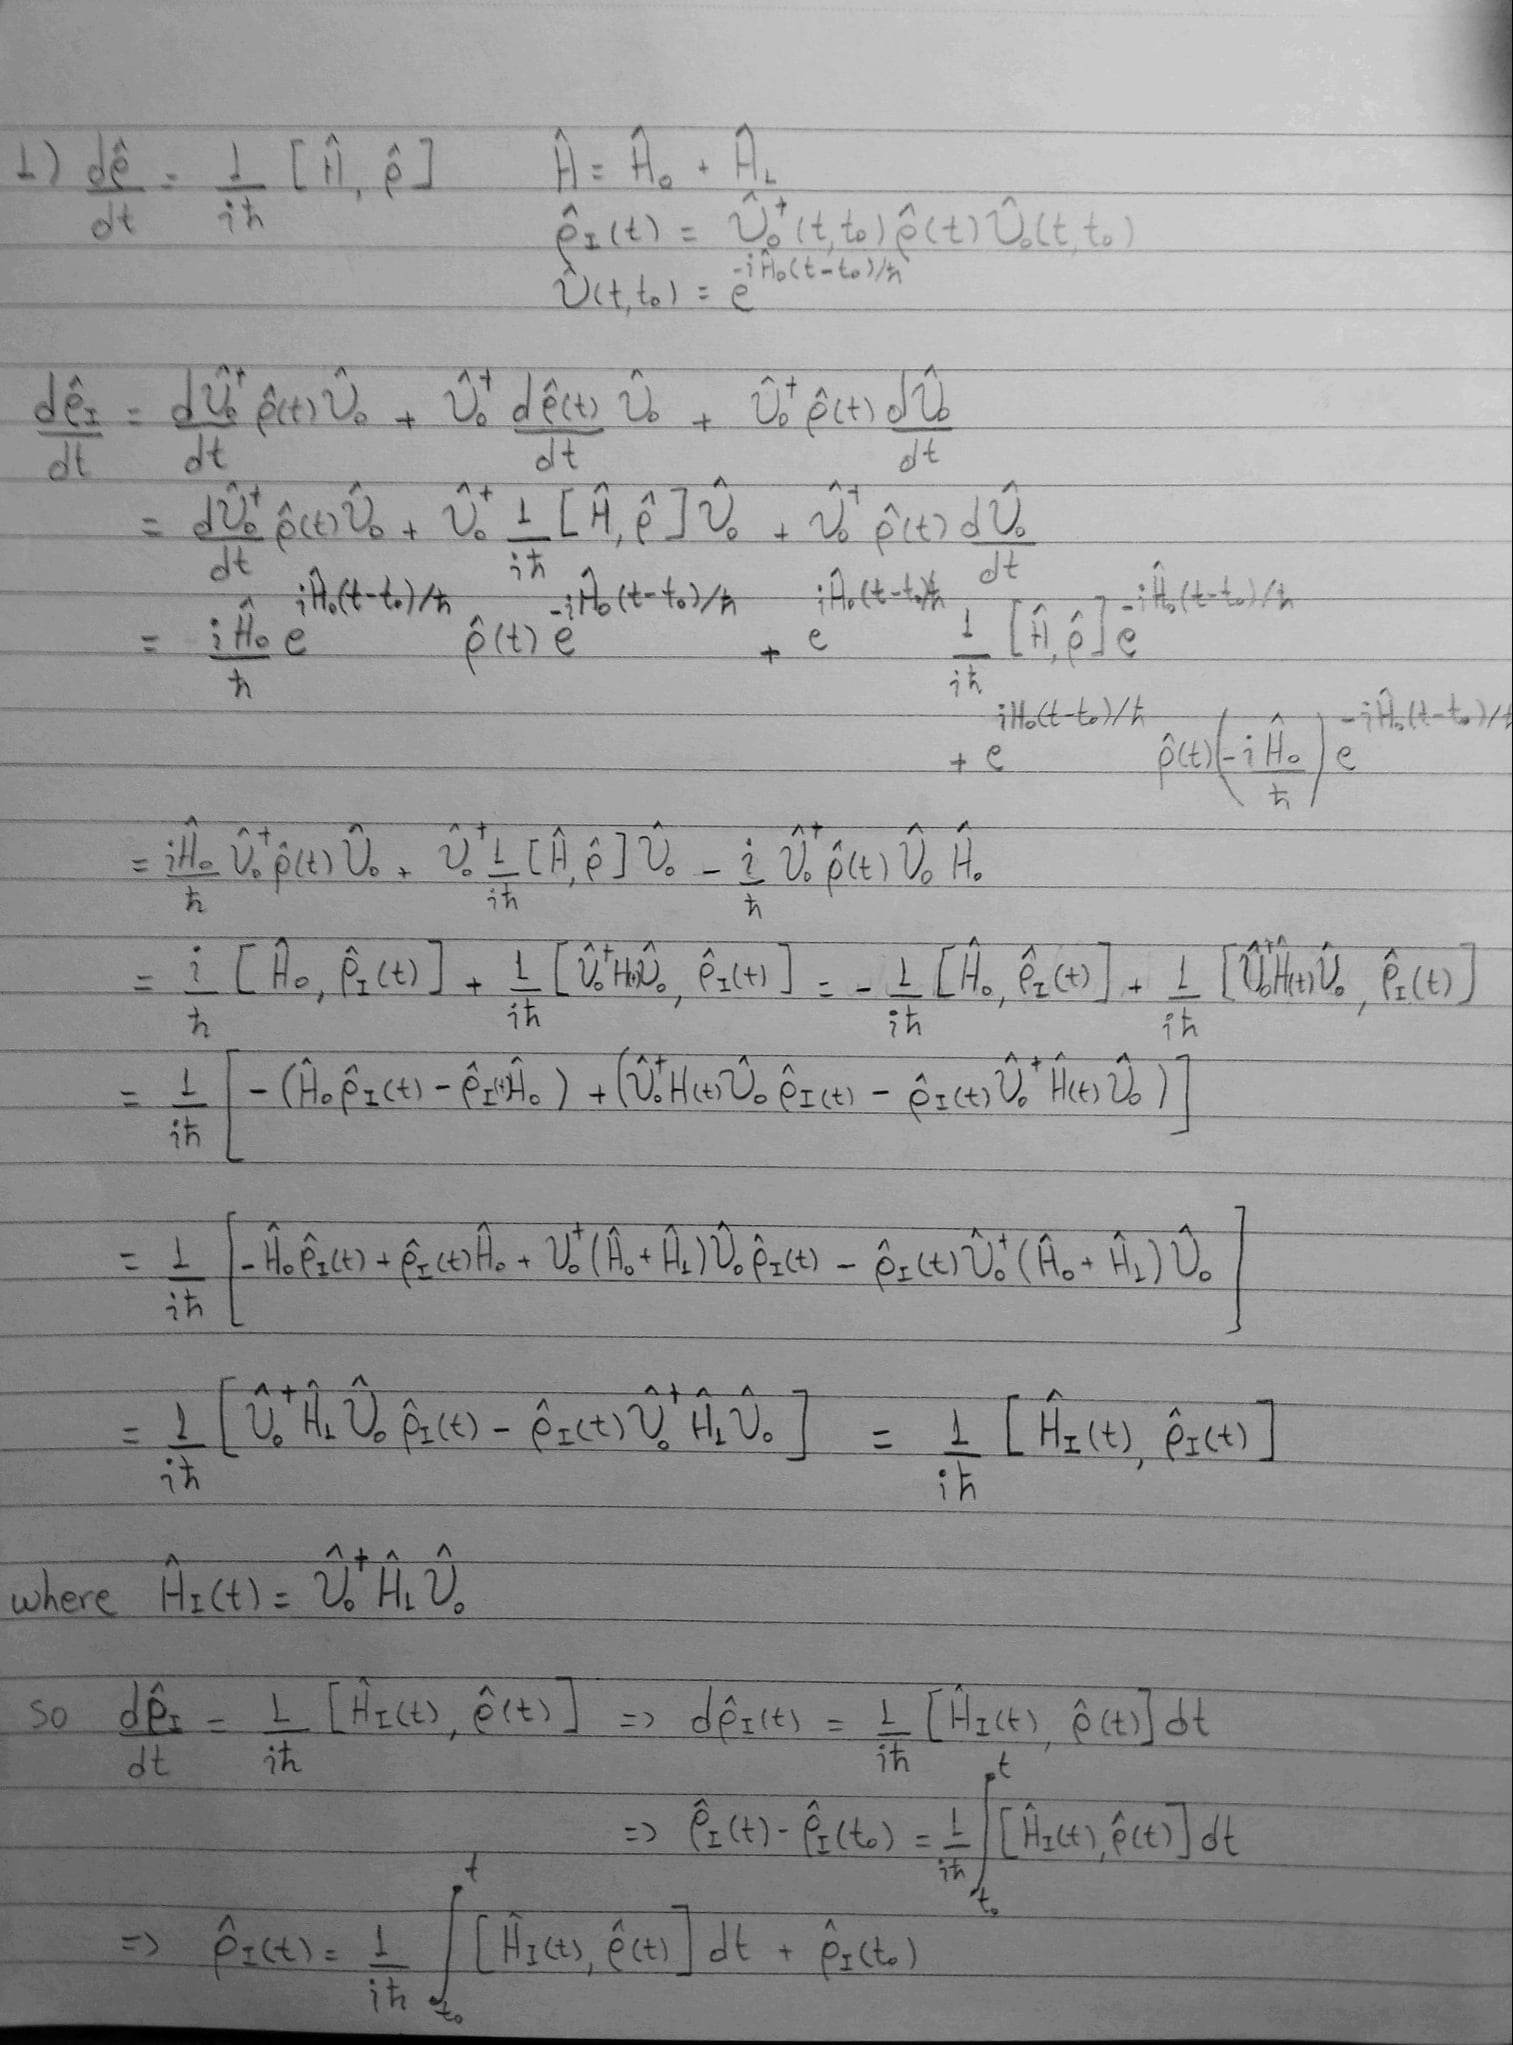


## 2.
A thermal equilibrium state is a mixed state with two key properties: <br>
    (i) it is stationary (unchanging) under Hamiltonian dynamics and <br>
    (ii) the probability $p_i$ of finding the system with energy $E_i$ is given by the Boltzmann distribution of statistical mechanics, i.e. $p_i = {\rm e}^{-\beta E_i}/Z$, where $\beta = 1/k_BT$ is the inverse temperature and $Z = \sum_i {\rm e}^{-\beta E_i}$ is the partition function.<br>

In quantum mechanics, the thermal state of a system whose dynamics are governed by the Hamiltonian $\hat{H}$ is given by

$$\hat{\rho}_\beta = \frac{{\rm e}^{-\beta \hat{H}}}{Z}, $$

where $Z = {\rm tr}[{\rm e}^{-\beta \hat{H}}]$.

(a) Show that this state obeys both properties (i) and (ii).    

(b) For a qubit with Hamiltonian $\hat{H} = \tfrac{1}{2}\hbar\omega \hat{\sigma}_z$, show that

$$ \hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbb{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right].$$

(Hint: take a look at Exercise 1(a), Worksheet 1)

(c) Find analytical expressions for the expectation values of the three Pauli matrices in the above thermal equilibrium state. Plot the thermal expectation value of $\langle \hat{\sigma}_z\rangle$ as a function of dimensionless temperature, $k_B T/\hbar\omega$.

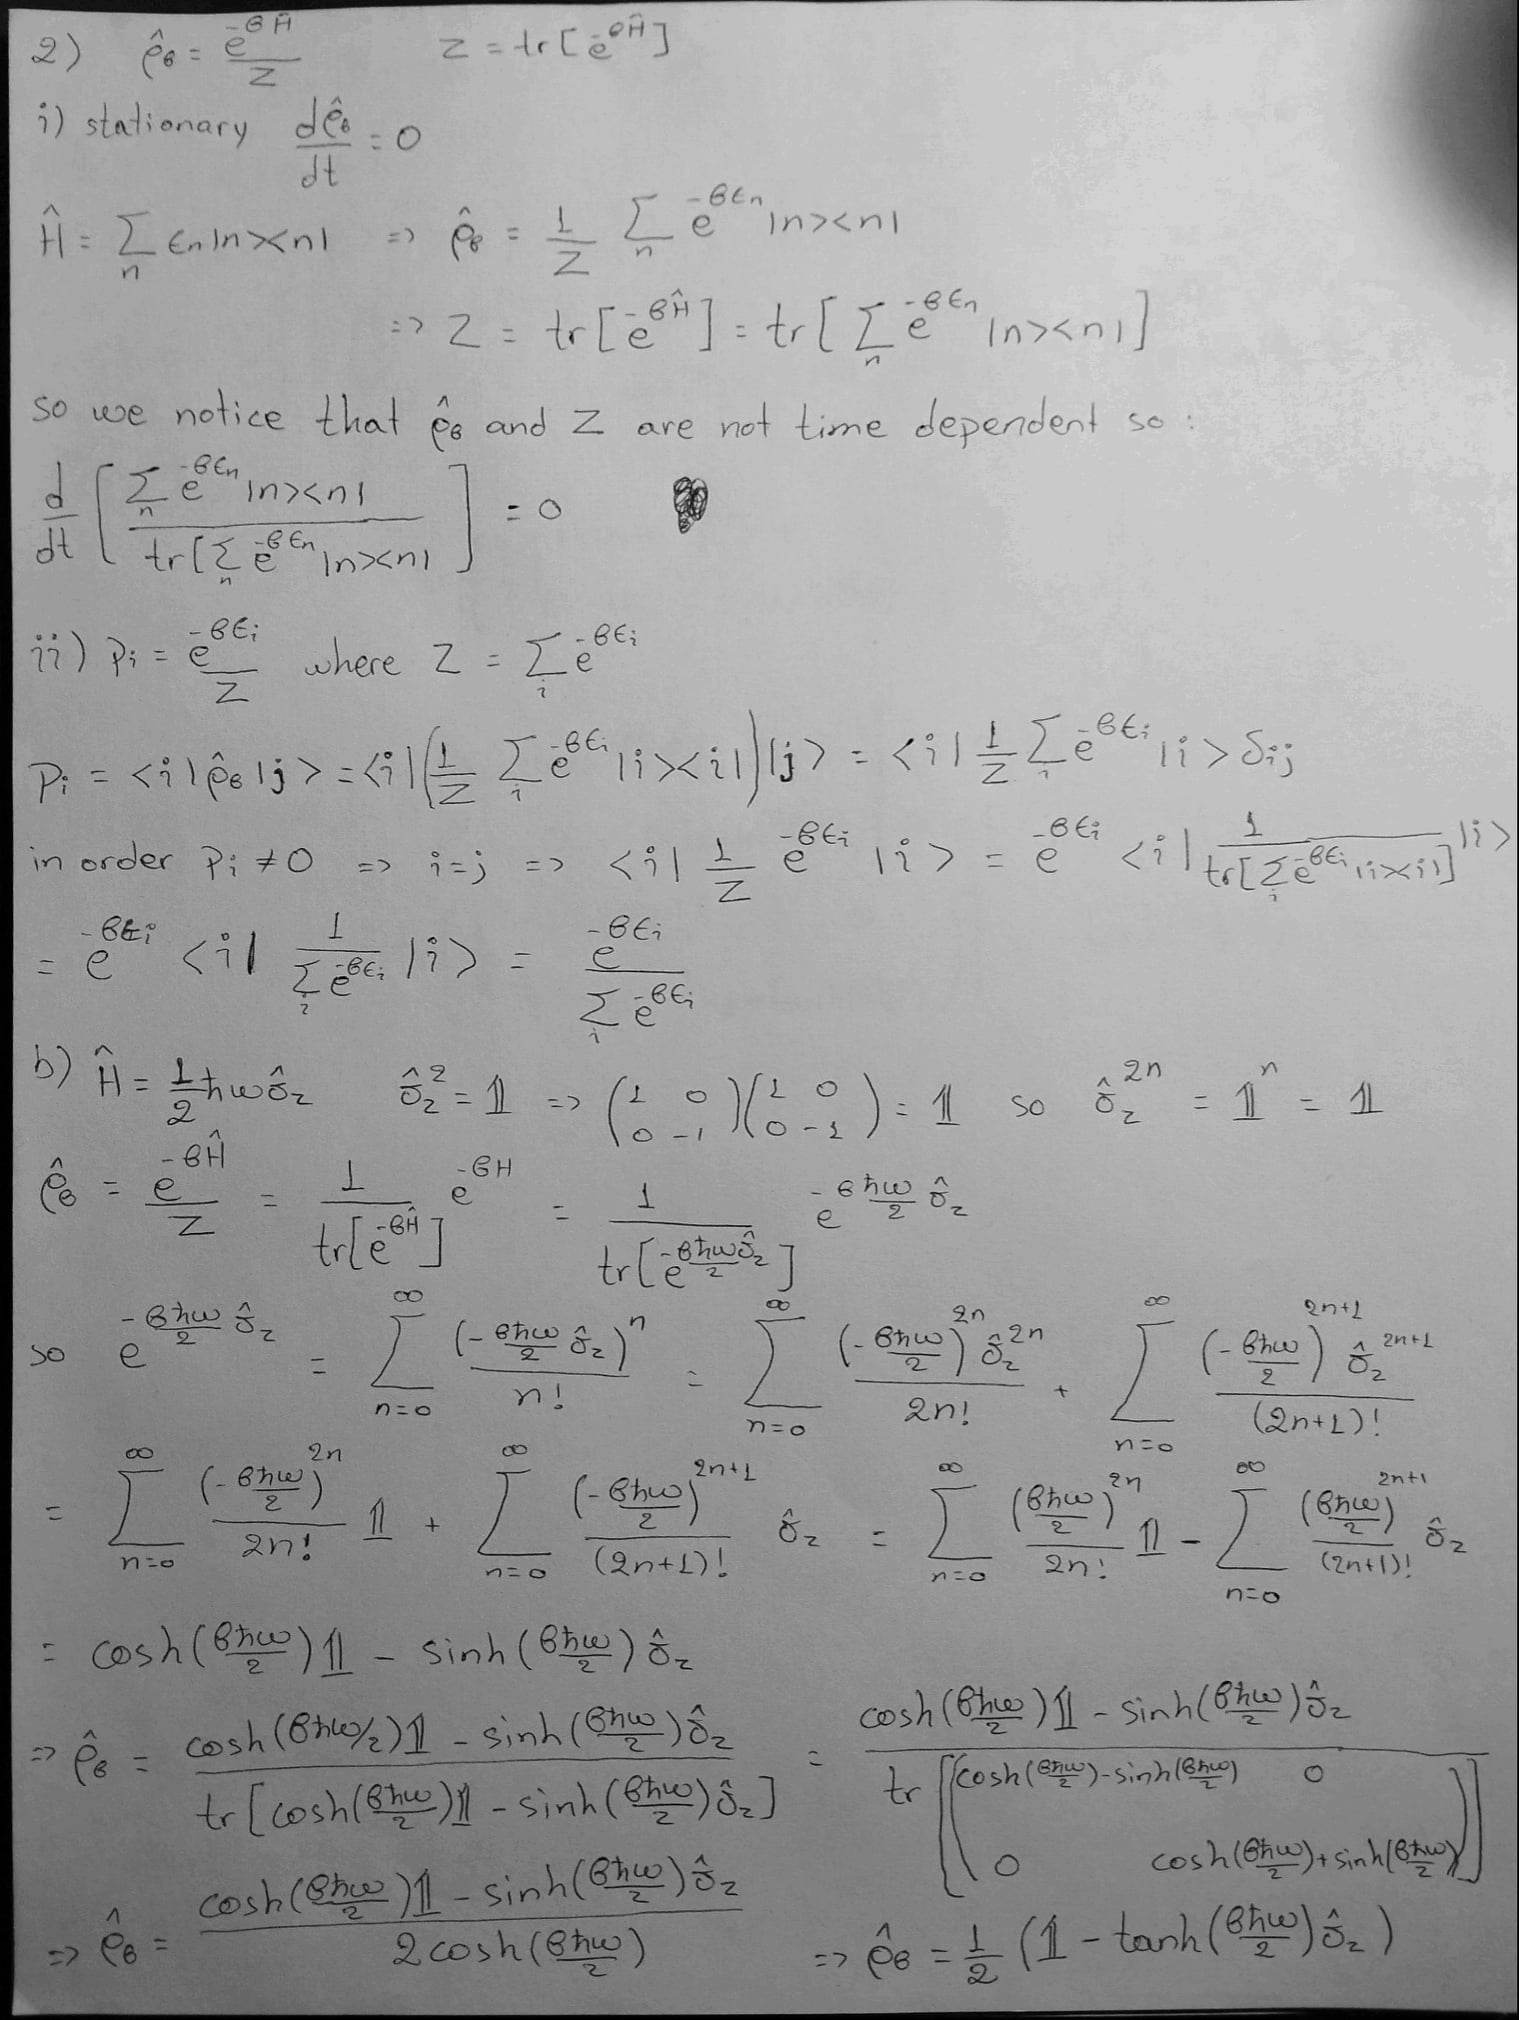

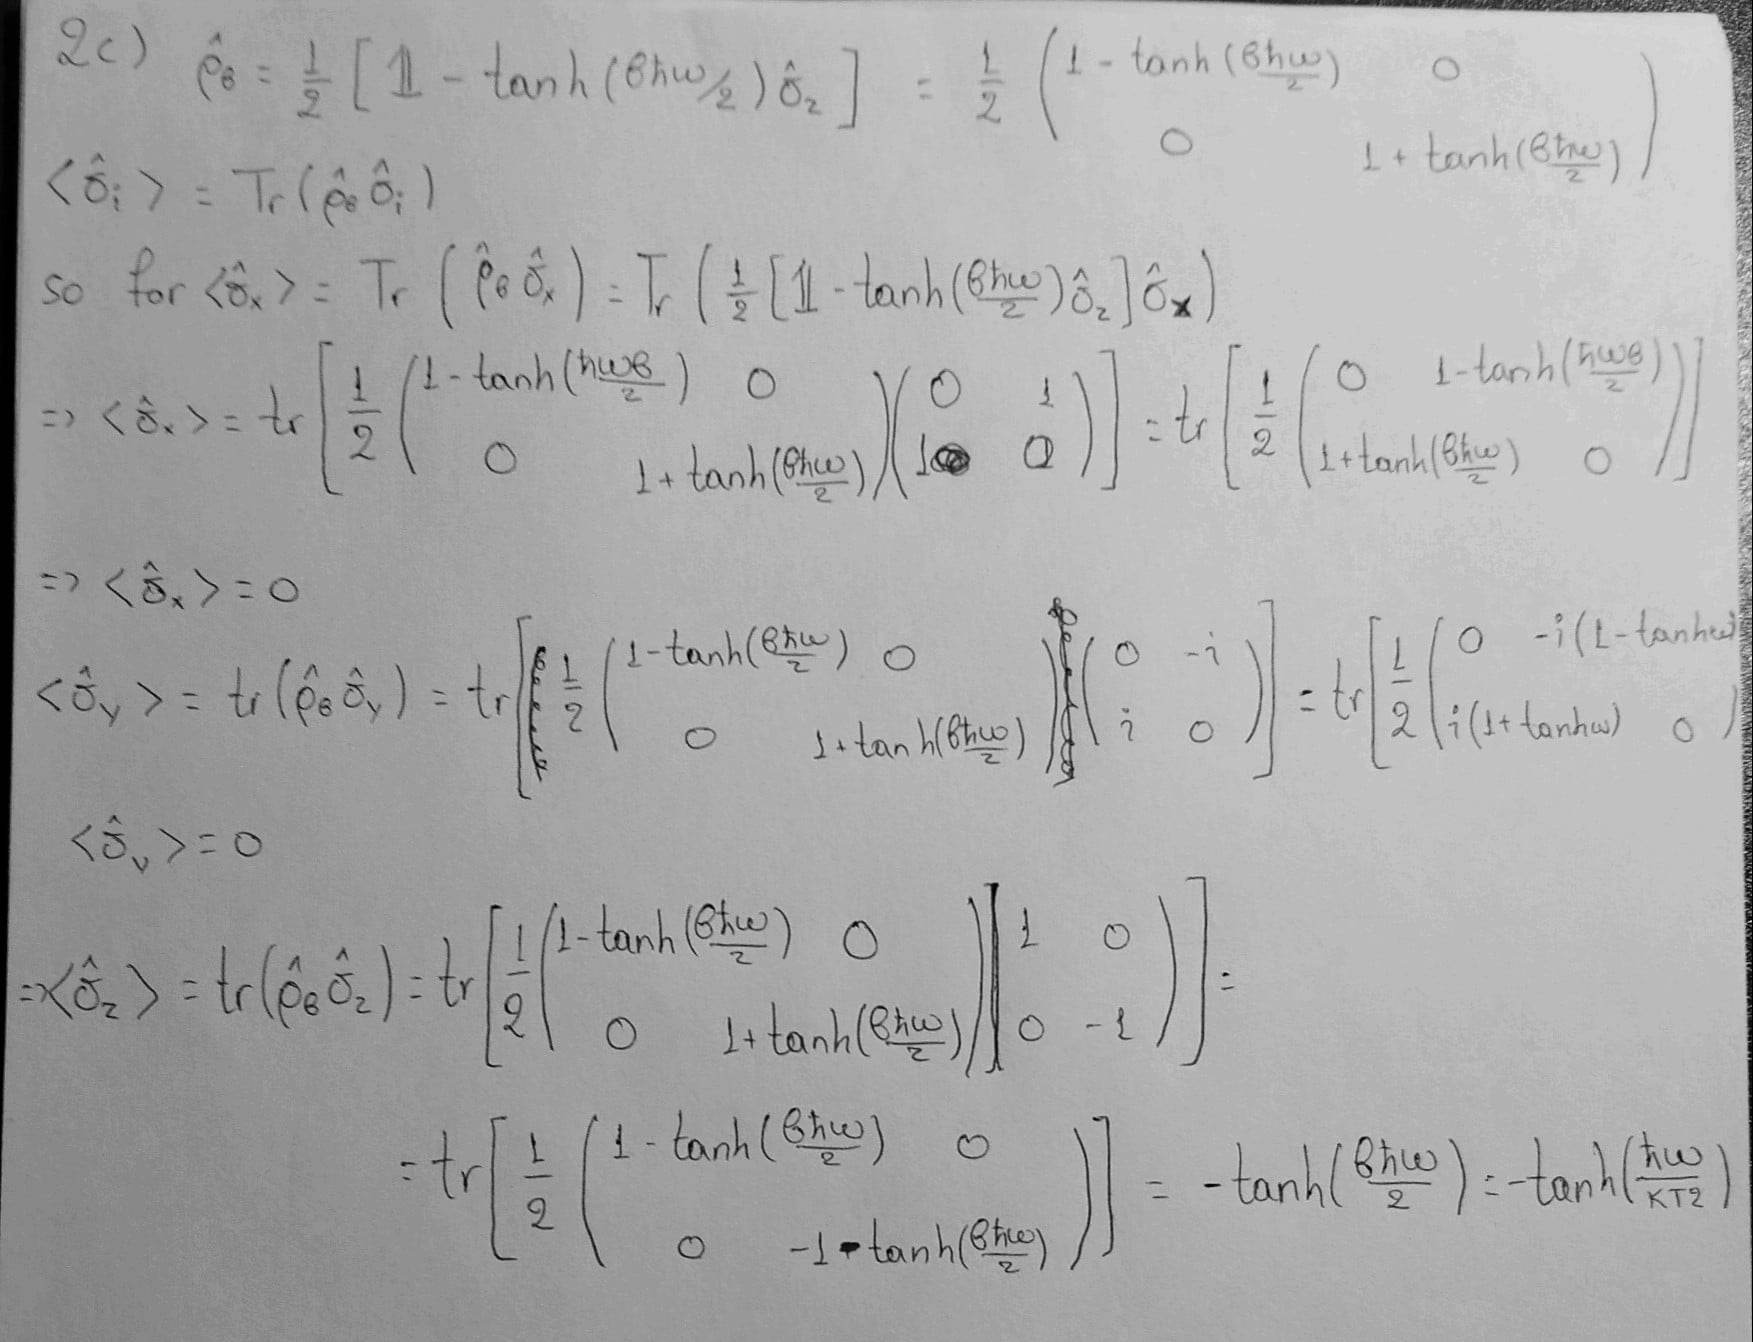

/var/folders/fr/p1j_16v5509589zqnf_6g6_40000gn/T/ipykernel_77951/3385652914.py:7: RuntimeWarning: divide by zero encountered in true_divide
  exp_sigma_z = - np.tanh(1/(2*x))


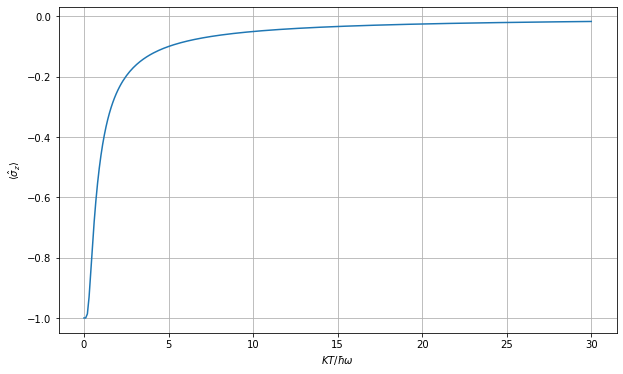

In [177]:
import numpy as np
import matplotlib.pyplot as plt

#because we want to plot expval of σ(z) as a function of dimensionless temperature, we set hbar*ω/k*T as x

x = np.linspace(0, 30, 300)
exp_sigma_z = - np.tanh(1/(2*x))

plt.figure(figsize = (10,6))
plt.plot(x, exp_sigma_z )
plt.xlabel('$KT/ \hbar \omega$')
plt.ylabel('$\\langle \\hat{\\sigma}_{z}\\rangle$')
plt.grid()

## 3. 
The following function samples a "biased coin", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works.

In [71]:
from random import random
def biased_coin(p):
    r = random()
    if r<p:
        return 0
    else:
        return 1
print(biased_coin(0.2))
    

1


(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function).

([<matplotlib.axis.XTick at 0x7fa1f41c1880>,
 [Text(0, 0, ''), Text(0, 0, '')])

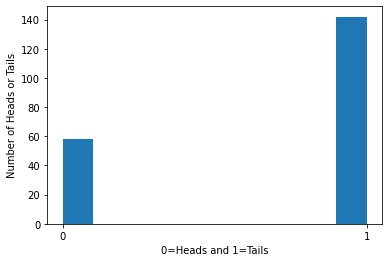

In [168]:
M = 200 #200 realisation
res = np.zeros(M) #array of zeros to store the 200 outputs


for i in range(M):
    res[i] = biased_coin(0.3) #res is the result of the biased coinflip with p=0.3
    
plt.hist(res)
plt.ylabel('Number of Heads or Tails')
plt.xlabel('0=Heads and 1=Tails')
plt.xticks((0,1))   

(b) Write an analogous function that samples a "three-sided coin", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$.

In [101]:
from random import random
def three_sided_coin(p0,p1):
    r = random()
    if r<p0:
        return 0
    elif r<p1:
        return 1
    else: 
        return 2
print(three_sided_coin(0.2,0.5))

1


([<matplotlib.axis.XTick at 0x7fa2138c75e0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

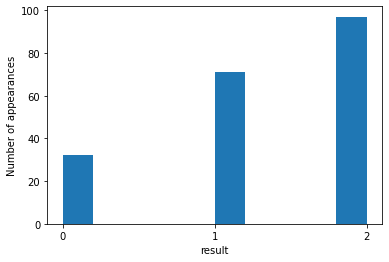

In [167]:
N = 200
res_2 = np.zeros(N)


for i in range(N):
    res_2[i] = three_sided_coin(0.2,0.5)

plt.hist(res_2) 
plt.ylabel('Number of appearances')
plt.xlabel('result')
plt.xticks((0,1,2))

## 4.
In this exercise we will compare the thermal state of a qubit
$$ \hat{\rho}_\beta = \frac{{\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2}}{Z},$$
to the pure state
$$|\psi_\beta\rangle = \frac{1}{\sqrt{Z}}\left({\rm e}^{-\beta\hbar\omega/4}|0\rangle + {\rm e}^{\beta\hbar\omega/4}|1\rangle\right), $$
where $Z = {\rm tr}({\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2})$.

(a) Write down general expressions for the density matrices corresponding to both of the above states.

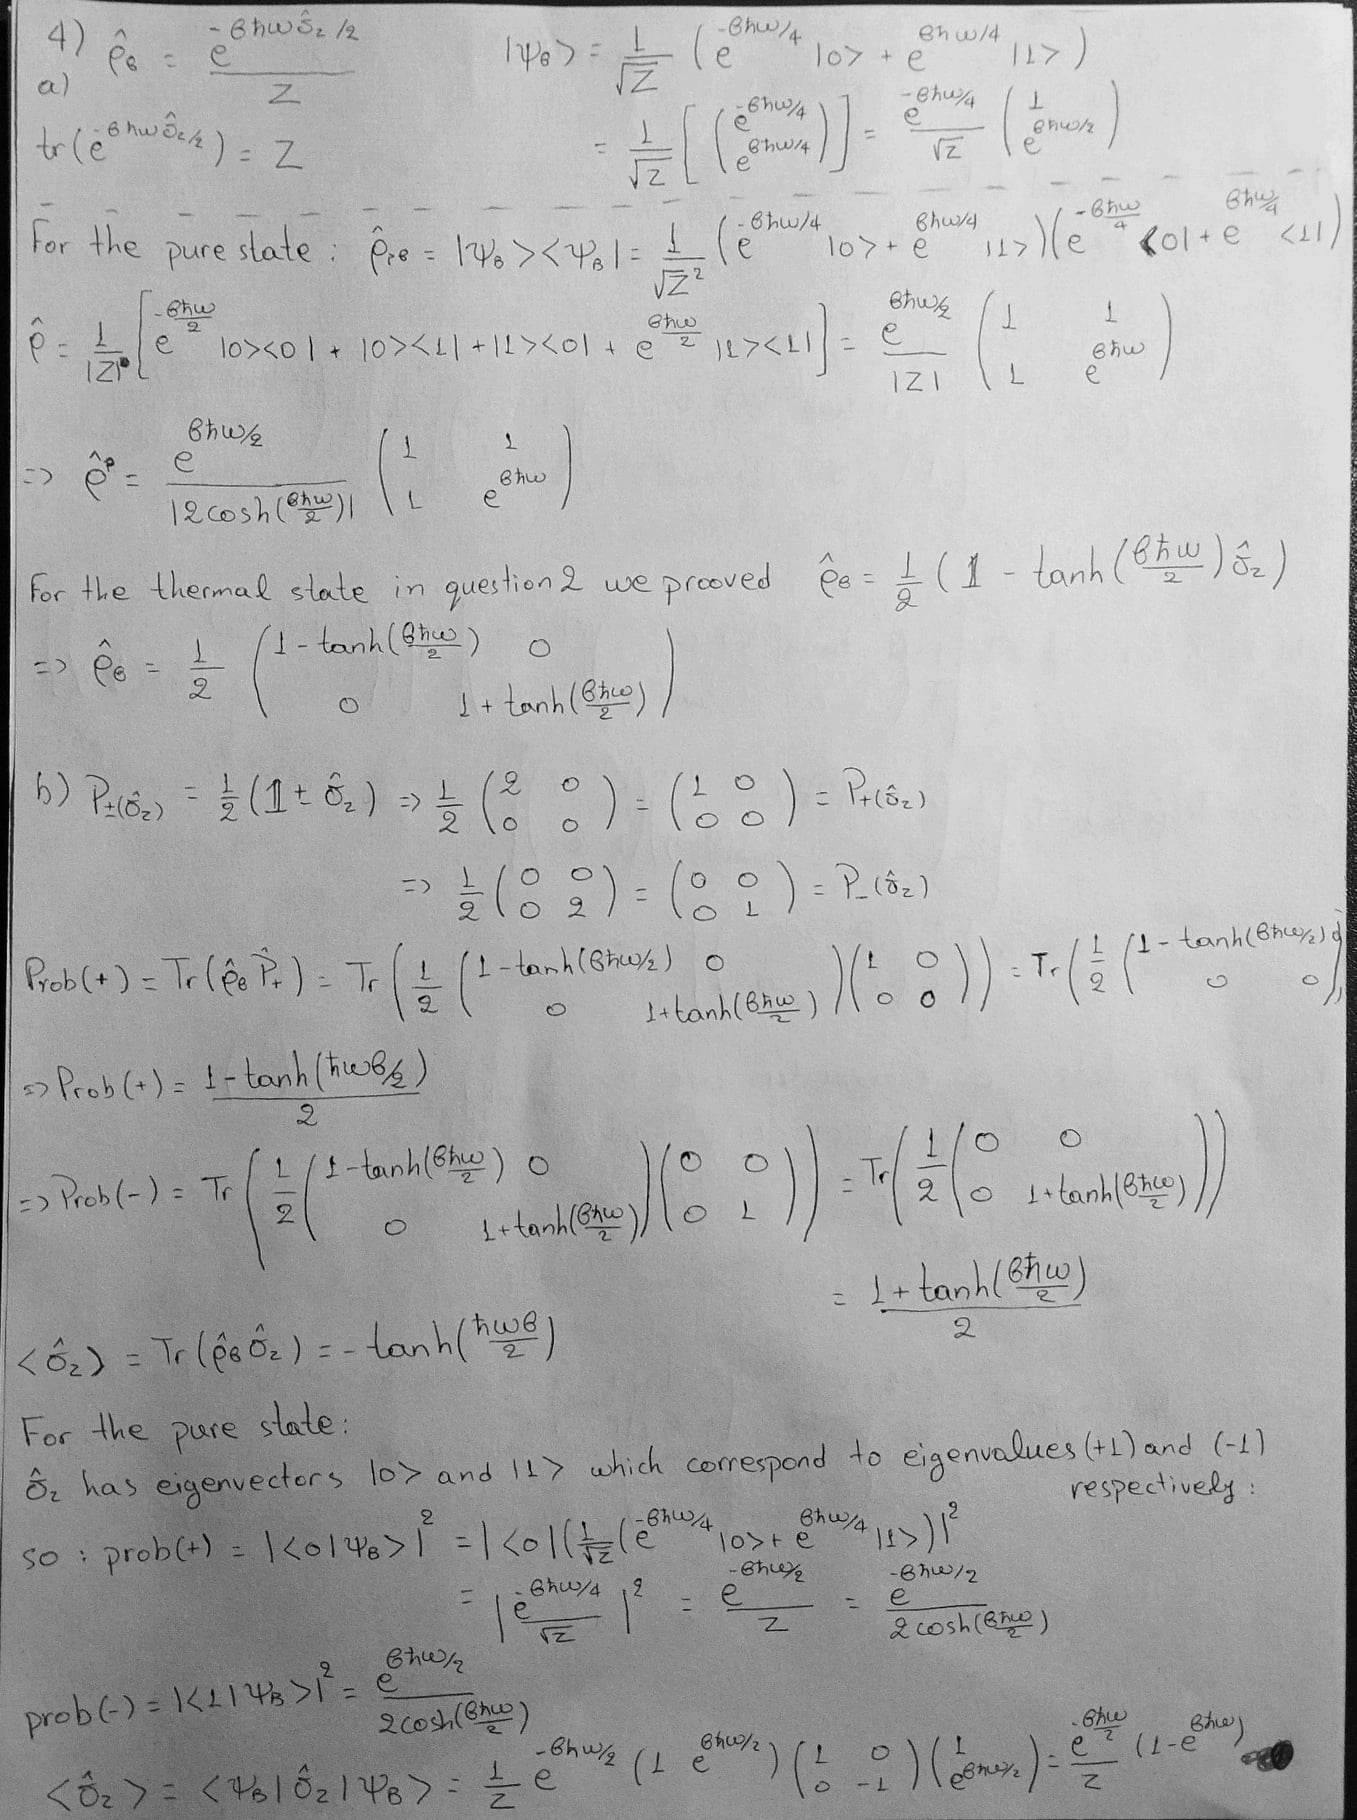

(b) Consider a projective measurement of the observable $\hat{\sigma}_z$. Give the probabilities of the two measurement outcomes for the thermal state $\hat{\rho}_\beta$. Give the analogous measurement outcome probabilities for the pure state $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_z\rangle$ for both states. Comment briefly on the results.

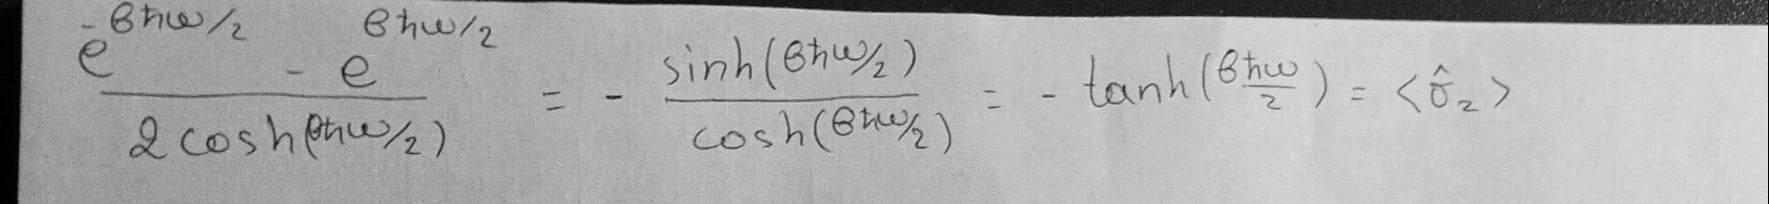

(c) Now consider a projective measurement of the observable $\hat{\sigma}_x$. Give the measurement outcome probabilities for the two different states $\hat{\rho}_\beta$ and $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_x\rangle$ for both states. Comment briefly on the results.

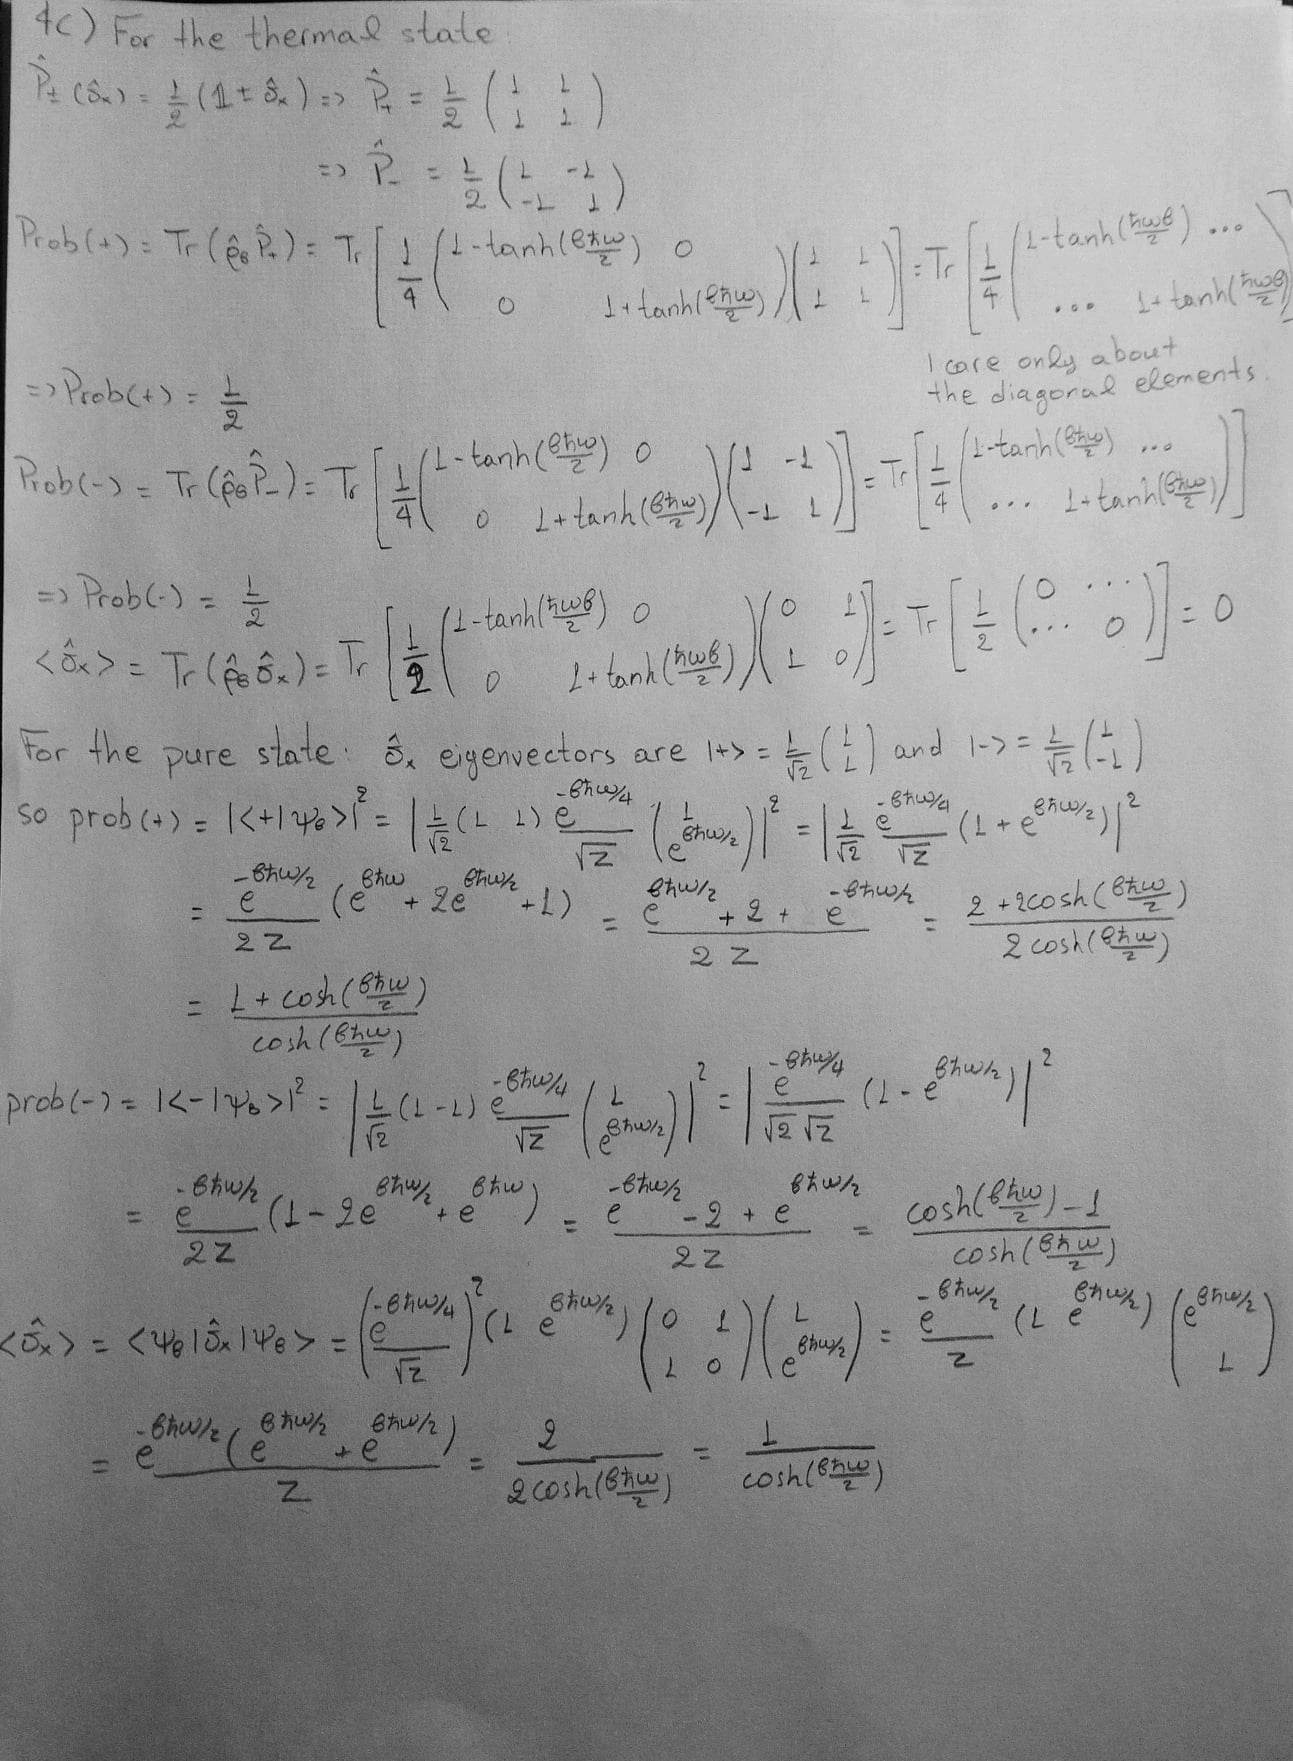

(d) Repeat the calculations for a projective measurement of $\hat{\sigma}_y$ and briefly comment on the result.

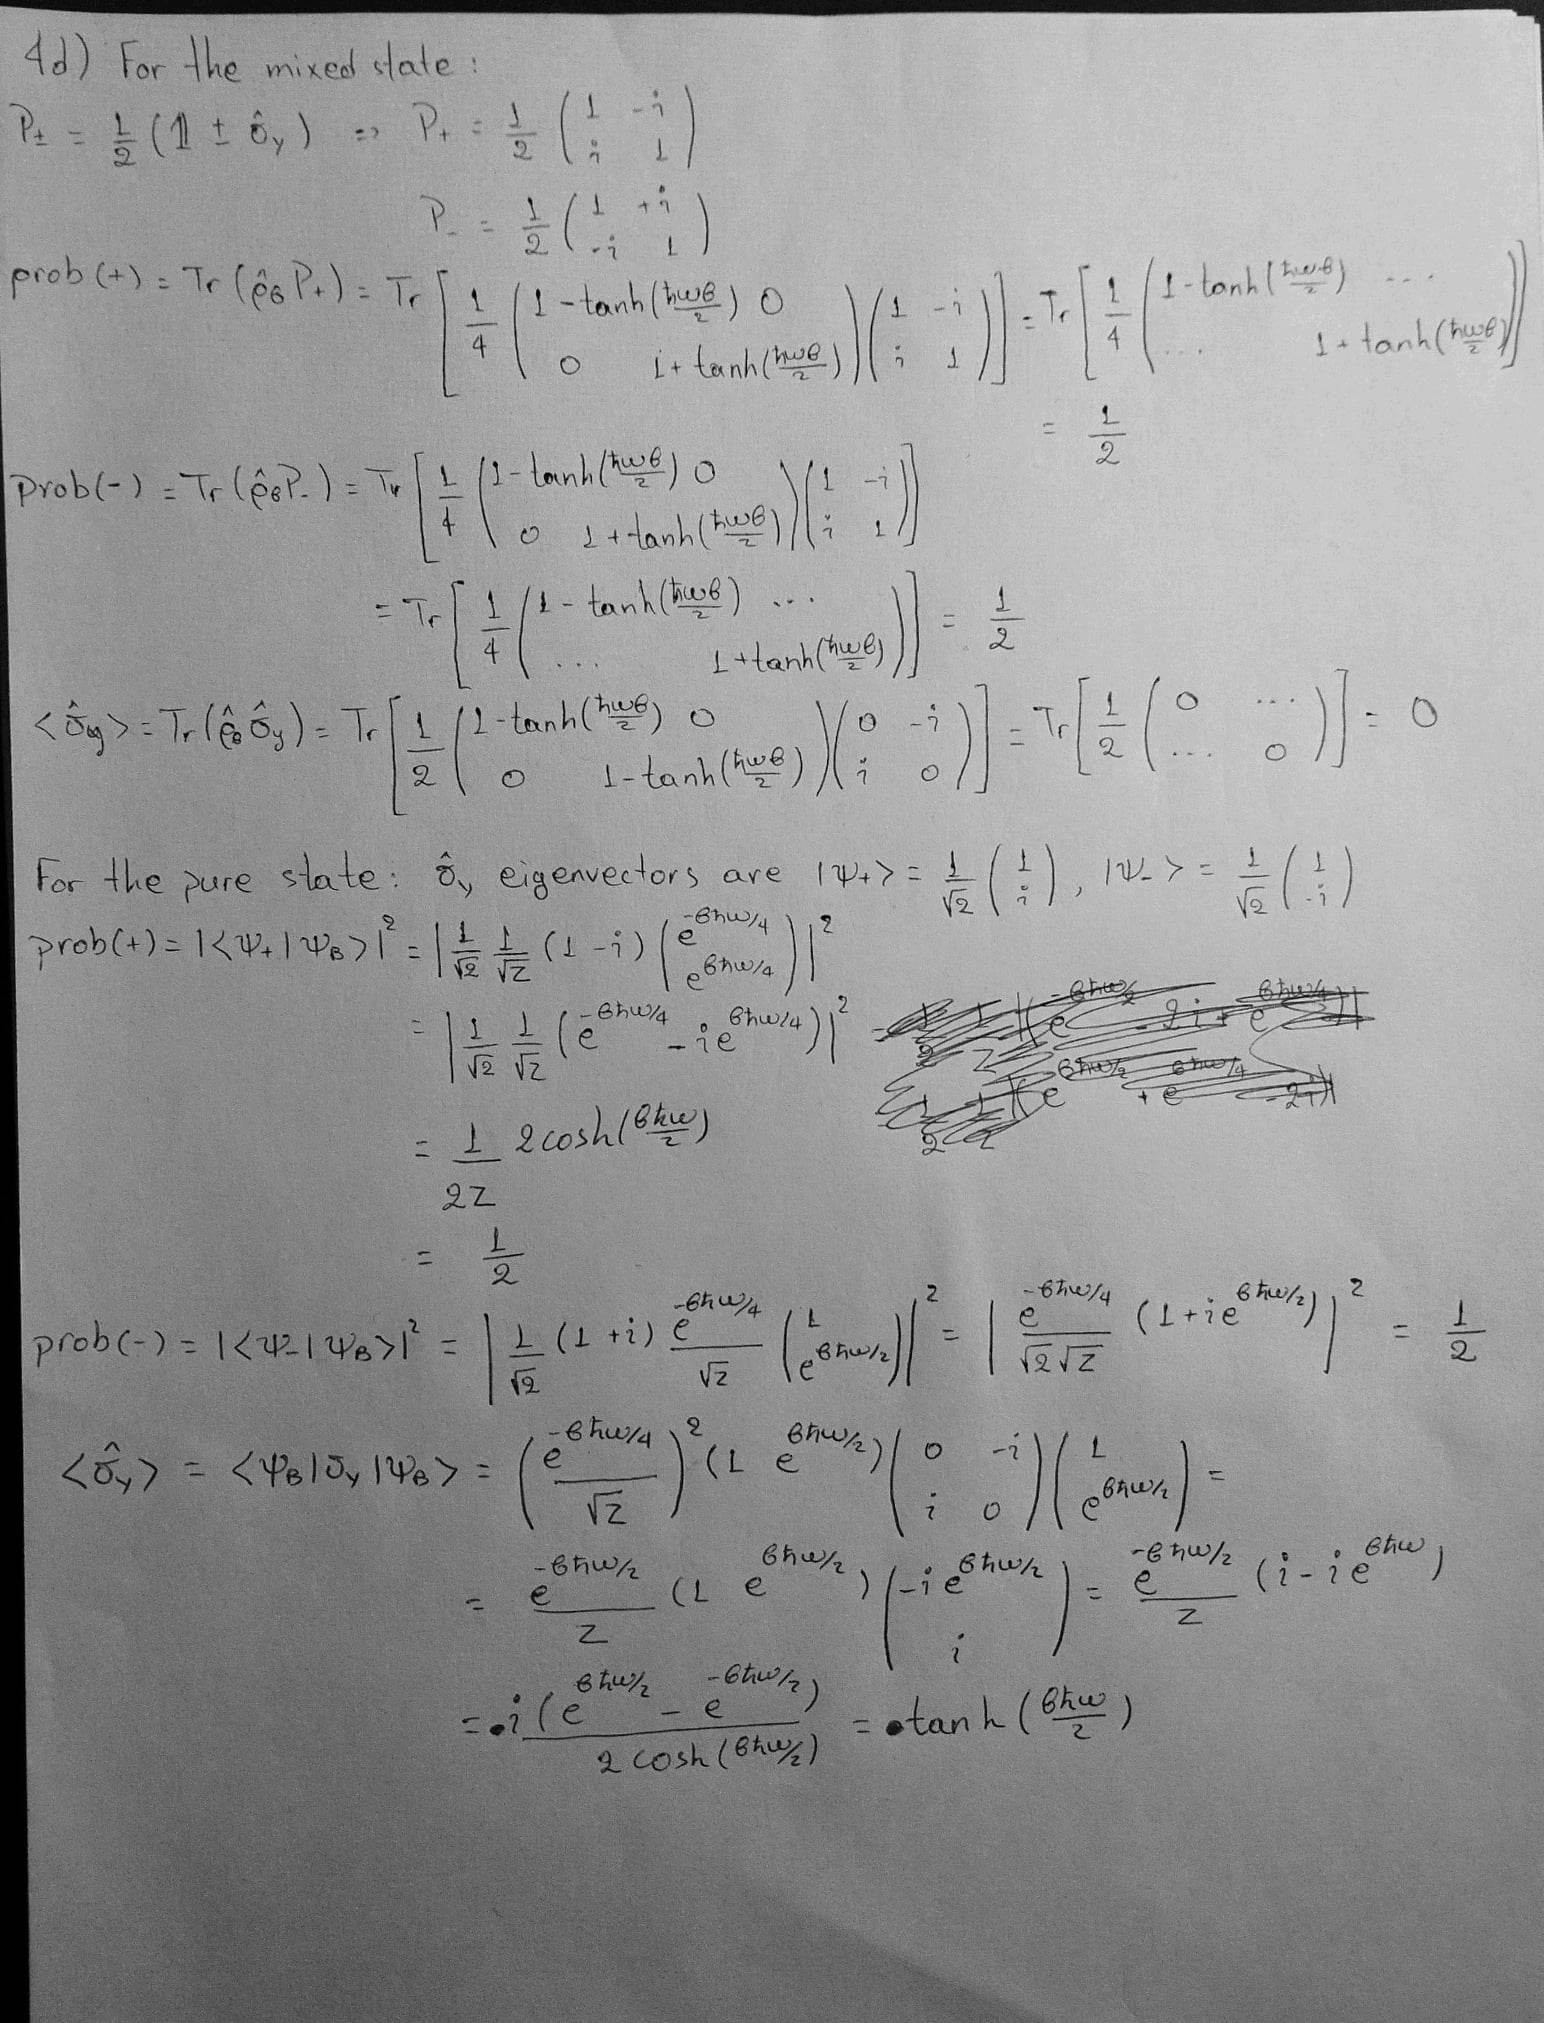

## 5. 
Consider the following simple decoherence model for a qubit. The Hamiltonian is 
$$ \hat{H} = \frac{\hbar\omega}{2} \hat{\sigma}_z,$$
where $\omega$ is a random variable that takes the values $\omega \in \{+\omega_0,-\omega_0\}$ with equal probabilities $p_+ = p_- = \tfrac{1}{2}$.

(a) Write down an analytical expression for the time-dependent density matrix describing the ensemble, starting from the initial condition $\hat{\rho}(0) = |+\rangle\langle +|$.

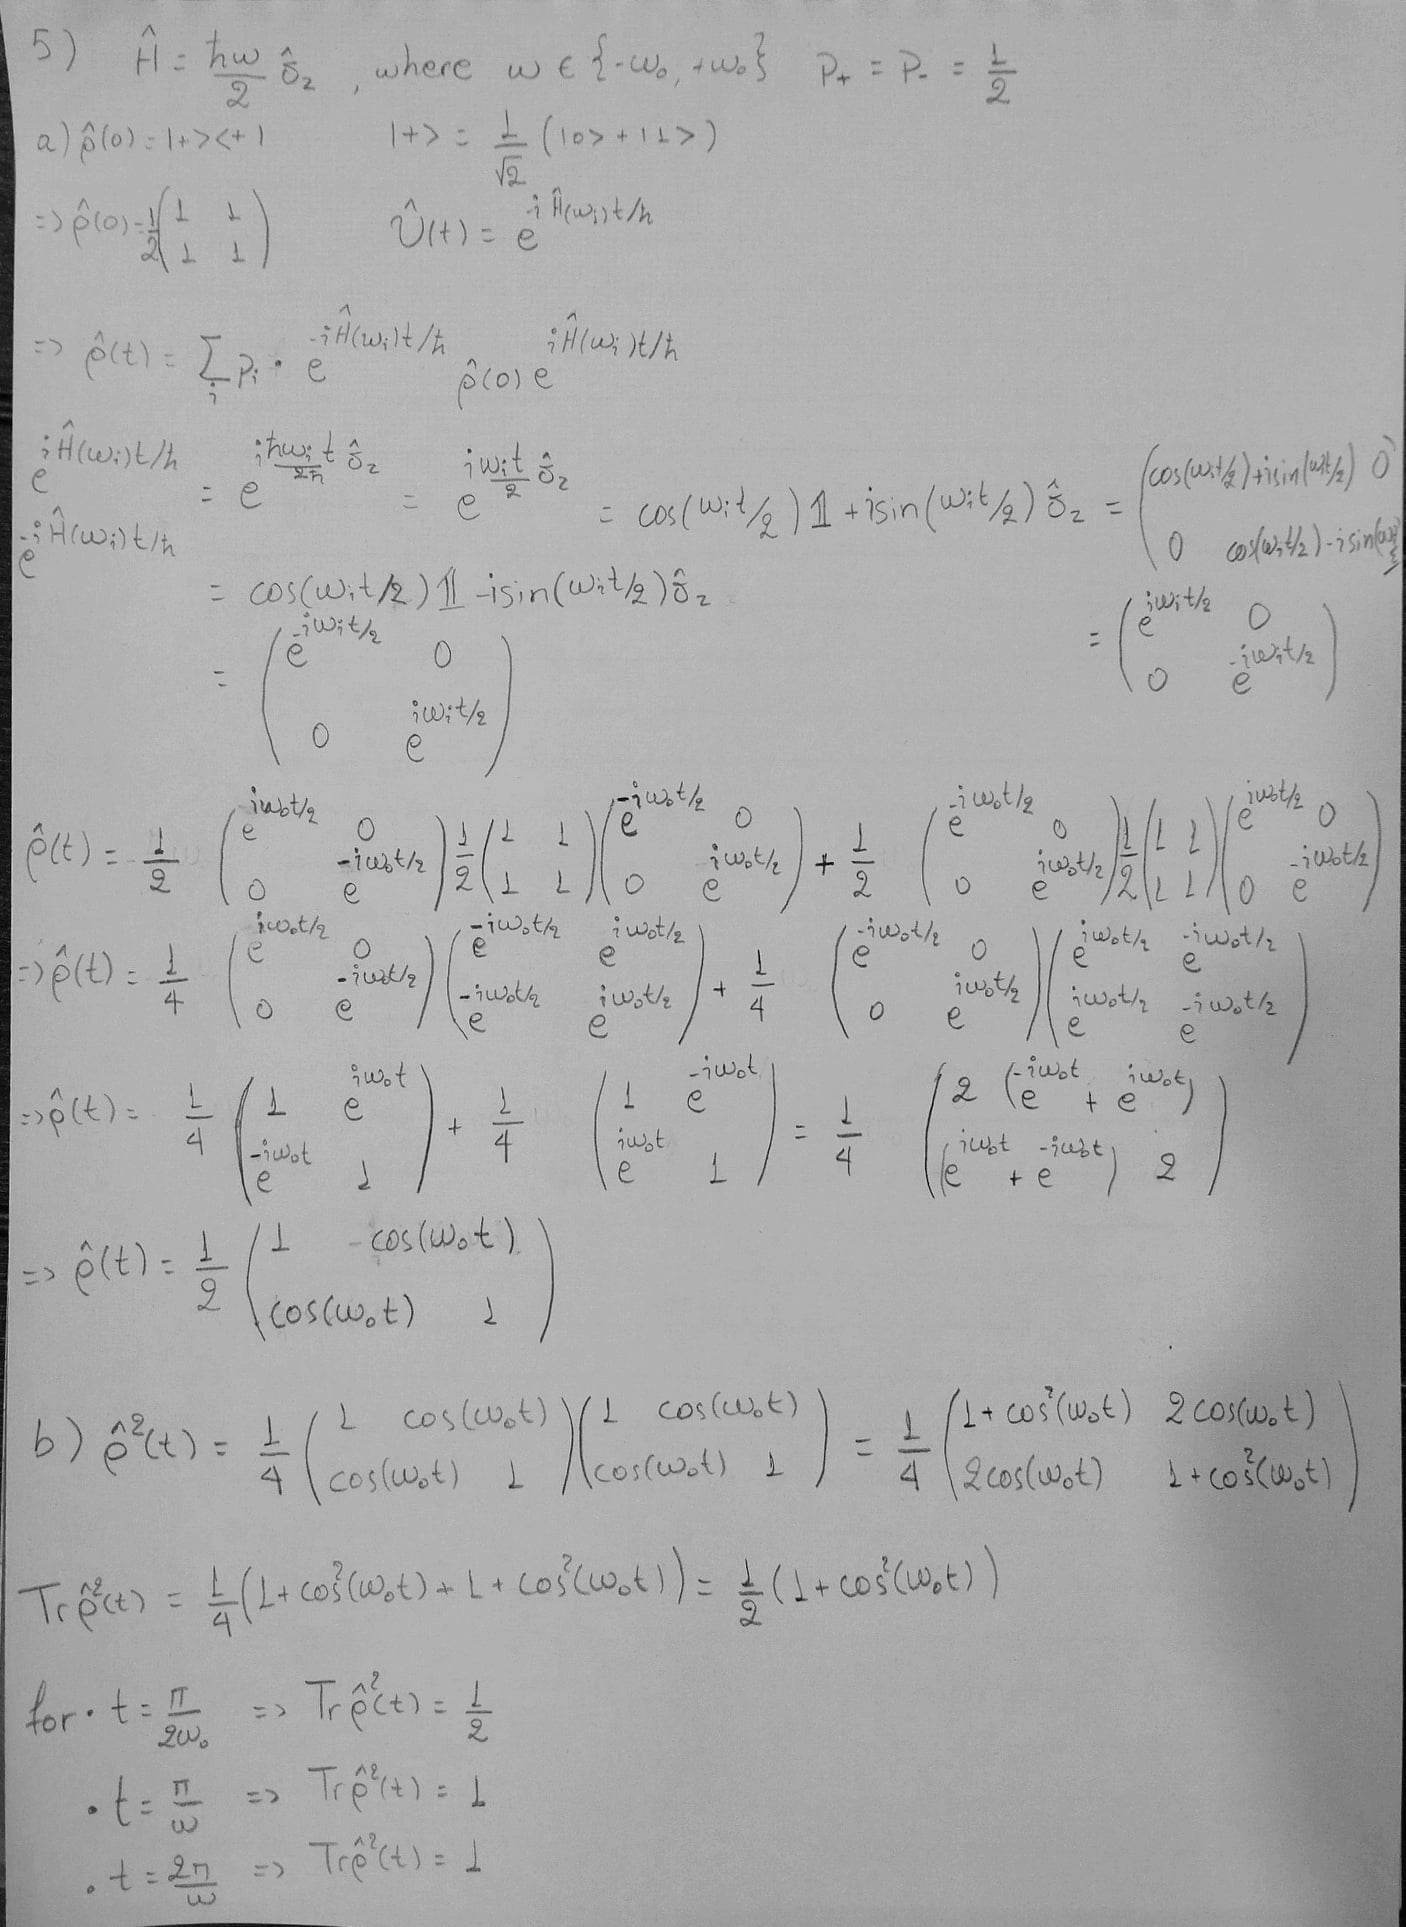

(b) The purity $P$ is defined by $P={\rm tr} \hat{\rho}^2$. It is a real number that varies between $P=1$ for a pure state and $P = 1/2$ for a maximally mixed state of a qubit. (More generally, $P$ varies between $1$ and $1/d$ for a system with Hilbert-space dimension $d$.) Plot the purity of the qubit density matrix as a function of time in the interval $\omega_0 t = [0,10]$. Comment briefly on what happens at $t = \pi/2\omega_0 $, $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$.

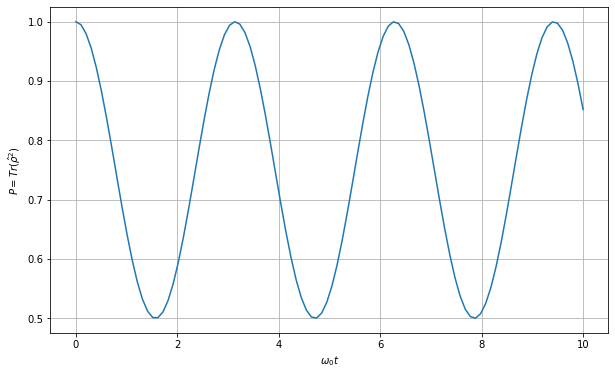

In [178]:
import numpy as np
import matplotlib.pyplot as plt

wt = np.linspace(0, 10, 100)
trace = 1/2 + 1/2*(np.cos(wt)**2)


plt.figure(figsize = (10,6))
plt.plot(wt, trace)

plt.xlabel('$\omega_{0} t$')
plt.ylabel('$P = Tr (\\hat{\\rho}^2)$')
plt.grid()

#We can see that for every t= nπ/ω_0, with n = 0,1,2,3.. then P = 1 so we have a pure state and for every t=nπ/2ω_0, 
#with n=1,2,3... then P= 1/2 so we have a maximally mixed state

## 6. 
Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations
$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$

(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

/var/folders/fr/p1j_16v5509589zqnf_6g6_40000gn/T/ipykernel_77951/3536557306.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  expval_x[i,j] = np.array(np.trace(r@sx),dtype = float)


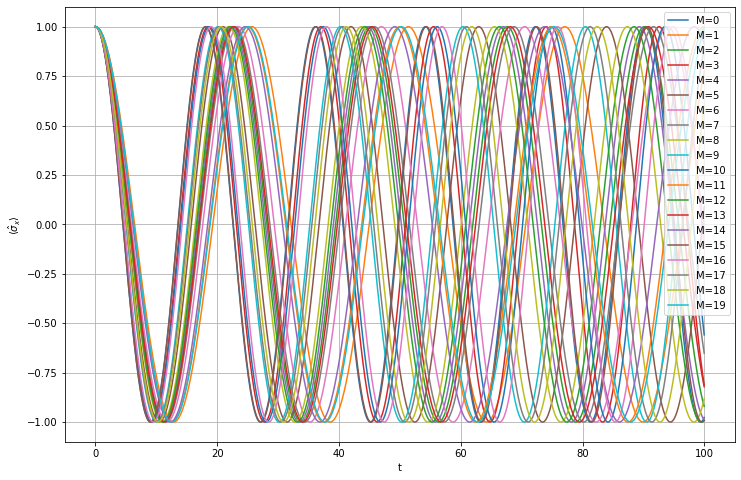

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#defining ρ_0
plus = (1/np.sqrt(2))*(np.array([[1],[1]]))
r_0 = np.outer(plus,plus)

# 𝔼[𝜔] and 𝔼[(𝜔−𝜔0)]
w_0 = 0.3
g = 0.1*w_0
mean = w_0
stddev = g
W = np.random.normal(mean, stddev,100)
dt = 0.05
t = np.arange(0,100,dt)
M = 20

#pauli matrices
sz = np.array([[1,0],[0,-1]])
sx = np.array([[0,1],[1,0]])

expval_x = np.zeros((M,len(t),1)) #array to store the 20 realisations
w = np.zeros((M,1))

for i in range(M): #calculating every expectation value
    w[i] = np.random.choice(W,1)
    H = (1/2)*w[i]*sz
    U = expm(-1j*H*dt)
    U_dag = U.conj().T
    r = r_0
        
    for j in range(len(t)):
        expval_x[i,j] = np.array(np.trace(r@sx),dtype = float)
        r = U@(r)@U_dag

        
plt.figure(figsize = (12,8))
for k in range(M):
    plt.plot(t,expval_x[k,:], label = 'M={}'.format(k))
  
plt.ylabel('$\\langle \\hat{\\sigma}_{x}\\rangle$')
plt.xlabel('t')
plt.legend(loc='upper right')
plt.grid()
plt.show()

(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as
    $$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$
    where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

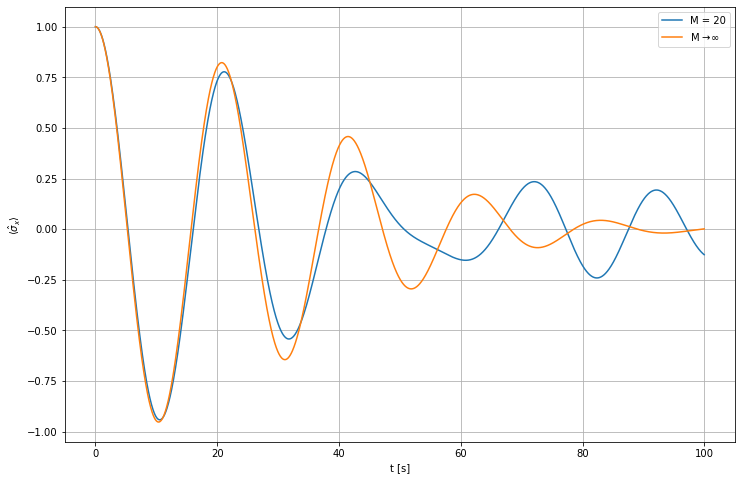

In [151]:
ave_expval_x = 0
for l in range(M):
    ave_expval_x = (ave_expval_x + expval_x[l,:]/M)
    
expval_x_inf = (np.exp(-((g**2)*(t**2))/2))*np.cos(w_0*t)

plt.figure(figsize = (12,8))
plt.plot(t, ave_expval_x, label = 'M = 20')
plt.plot(t,expval_x_inf, label = 'M $\\to\infty$')
plt.ylabel('$\\langle \\hat{\\sigma}_{x}\\rangle$')
plt.xlabel('t [s]')
plt.grid()
plt.legend()

## 7. 
The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$
where $\hat{\sigma}_\pm = \frac{1}{2}(\hat{\sigma}_x\pm{\rm i}\hat{\sigma}_y)$ are the usual qubit raising and lowering operators. 

(a) Verify that the Kraus operators above constitute a CPTP map.

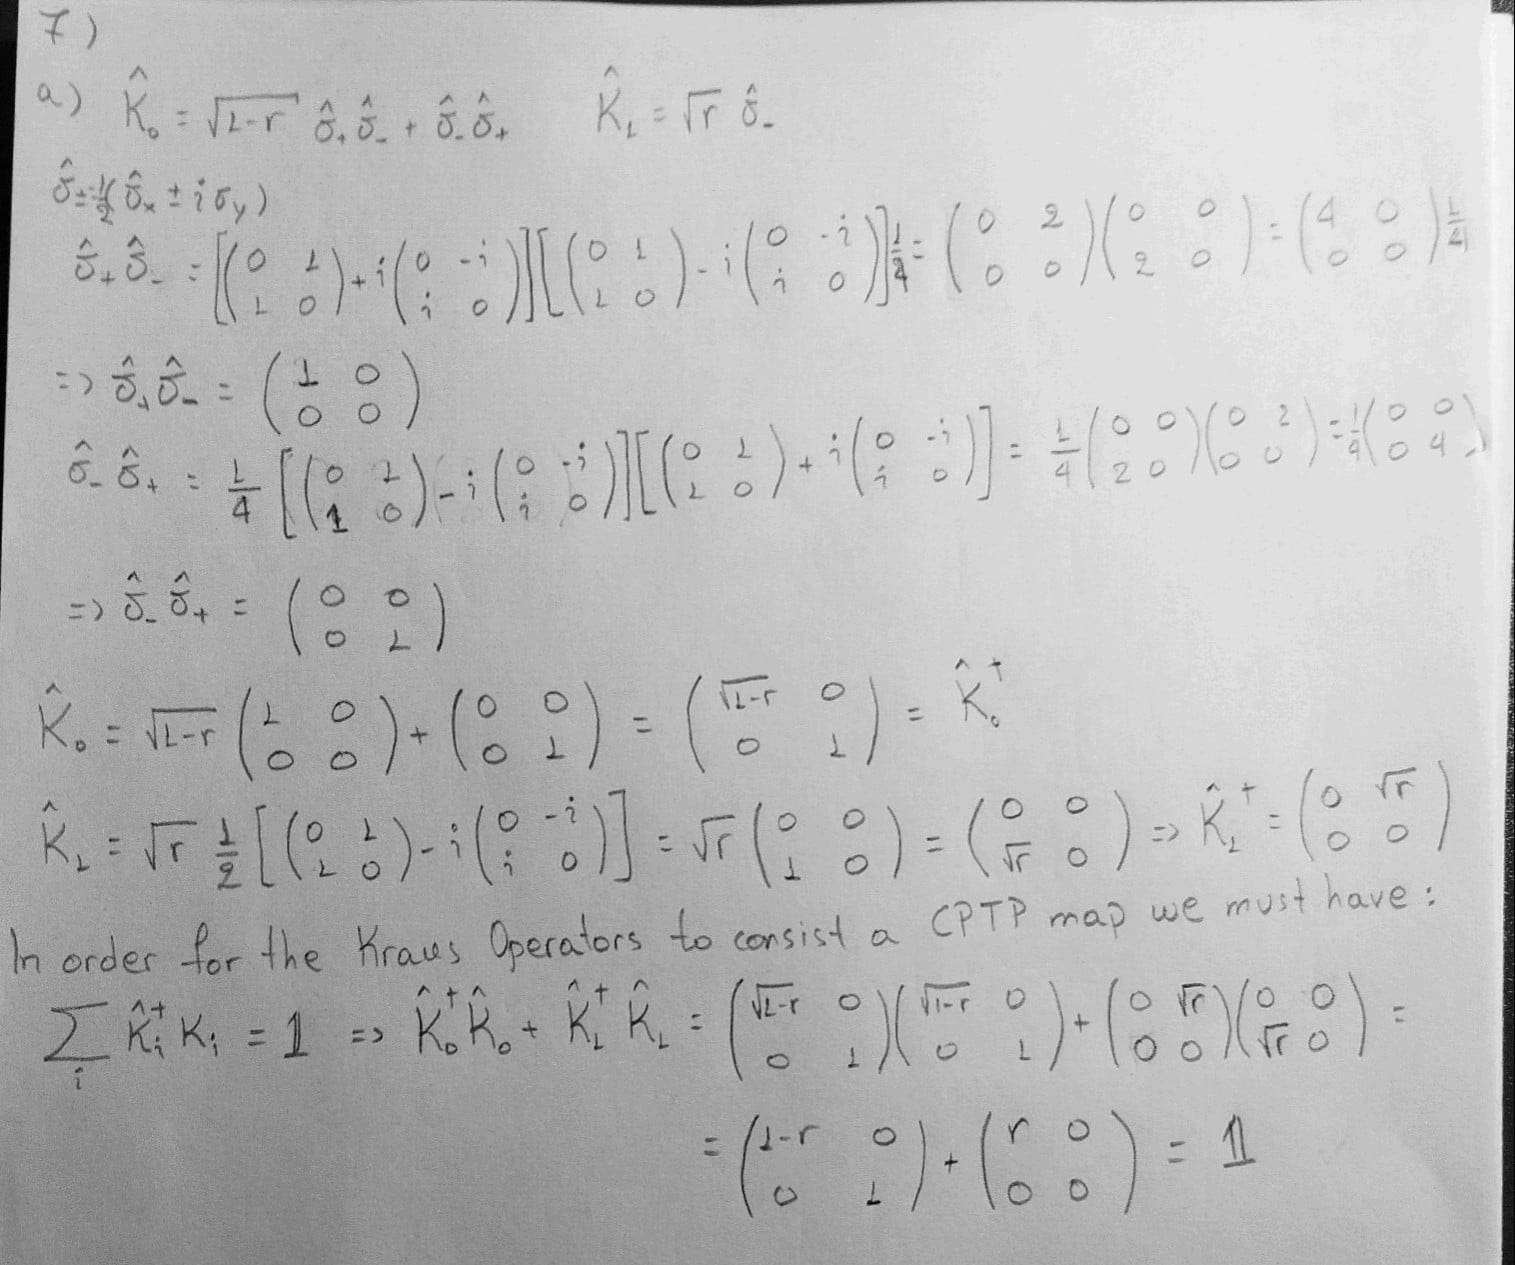

(b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

/var/folders/fr/p1j_16v5509589zqnf_6g6_40000gn/T/ipykernel_77951/4276680218.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Kraus_0 = np.array([[a, 0],[0, 1]])
/var/folders/fr/p1j_16v5509589zqnf_6g6_40000gn/T/ipykernel_77951/4276680218.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Kraus_1 = np.array([[0, 0],[b, 0]])
/var/folders/fr/p1j_16v5509589zqnf_6g6_40000gn/T/ipykernel_77951/4276680218.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diffe

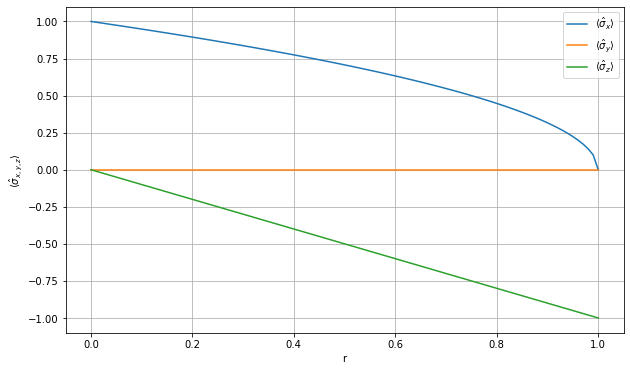

In [165]:
import numpy as np
import matplotlib.pyplot as plt

plus = (1/np.sqrt(2))*(np.array([[1],[1]]))
r_0 = np.outer(plus,plus)
r = np.linspace(0, 1, 100)

sx=np.array([[0,1],[1,0]])
sy=np.array([[0,-1j],[1j,0]])
sz=np.array([[1,0],[0,-1]])

a = np.sqrt(1-r)
b = np.sqrt(r)
Kraus_0 = np.array([[a, 0],[0, 1]])
Kraus_1 = np.array([[0, 0],[b, 0]])
Kraus_1dag = np.array([[0, b],[0, 0]])

E = (Kraus_0@r_0@Kraus_0) + (Kraus_1@r_0@Kraus_1dag)

expval_sx = np.trace(E@sx)
expval_sy = np.trace(E@sy)
expval_sz = np.trace(E@sz)


plt.figure(figsize = (10,6))
plt.plot(r, expval_sx, label = '$\\langle \\hat{\\sigma}_{x}\\rangle$')
plt.plot(r, expval_sy, label = '$\\langle \\hat{\\sigma}_{y}\\rangle$')
plt.plot(r, expval_sz, label = '$\\langle \\hat{\\sigma}_{z}\\rangle$')
plt.ylabel('$\\langle \\hat{\\sigma}_{x,y,z}\\rangle$')
plt.xlabel('r')
plt.grid()
plt.legend()






(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.

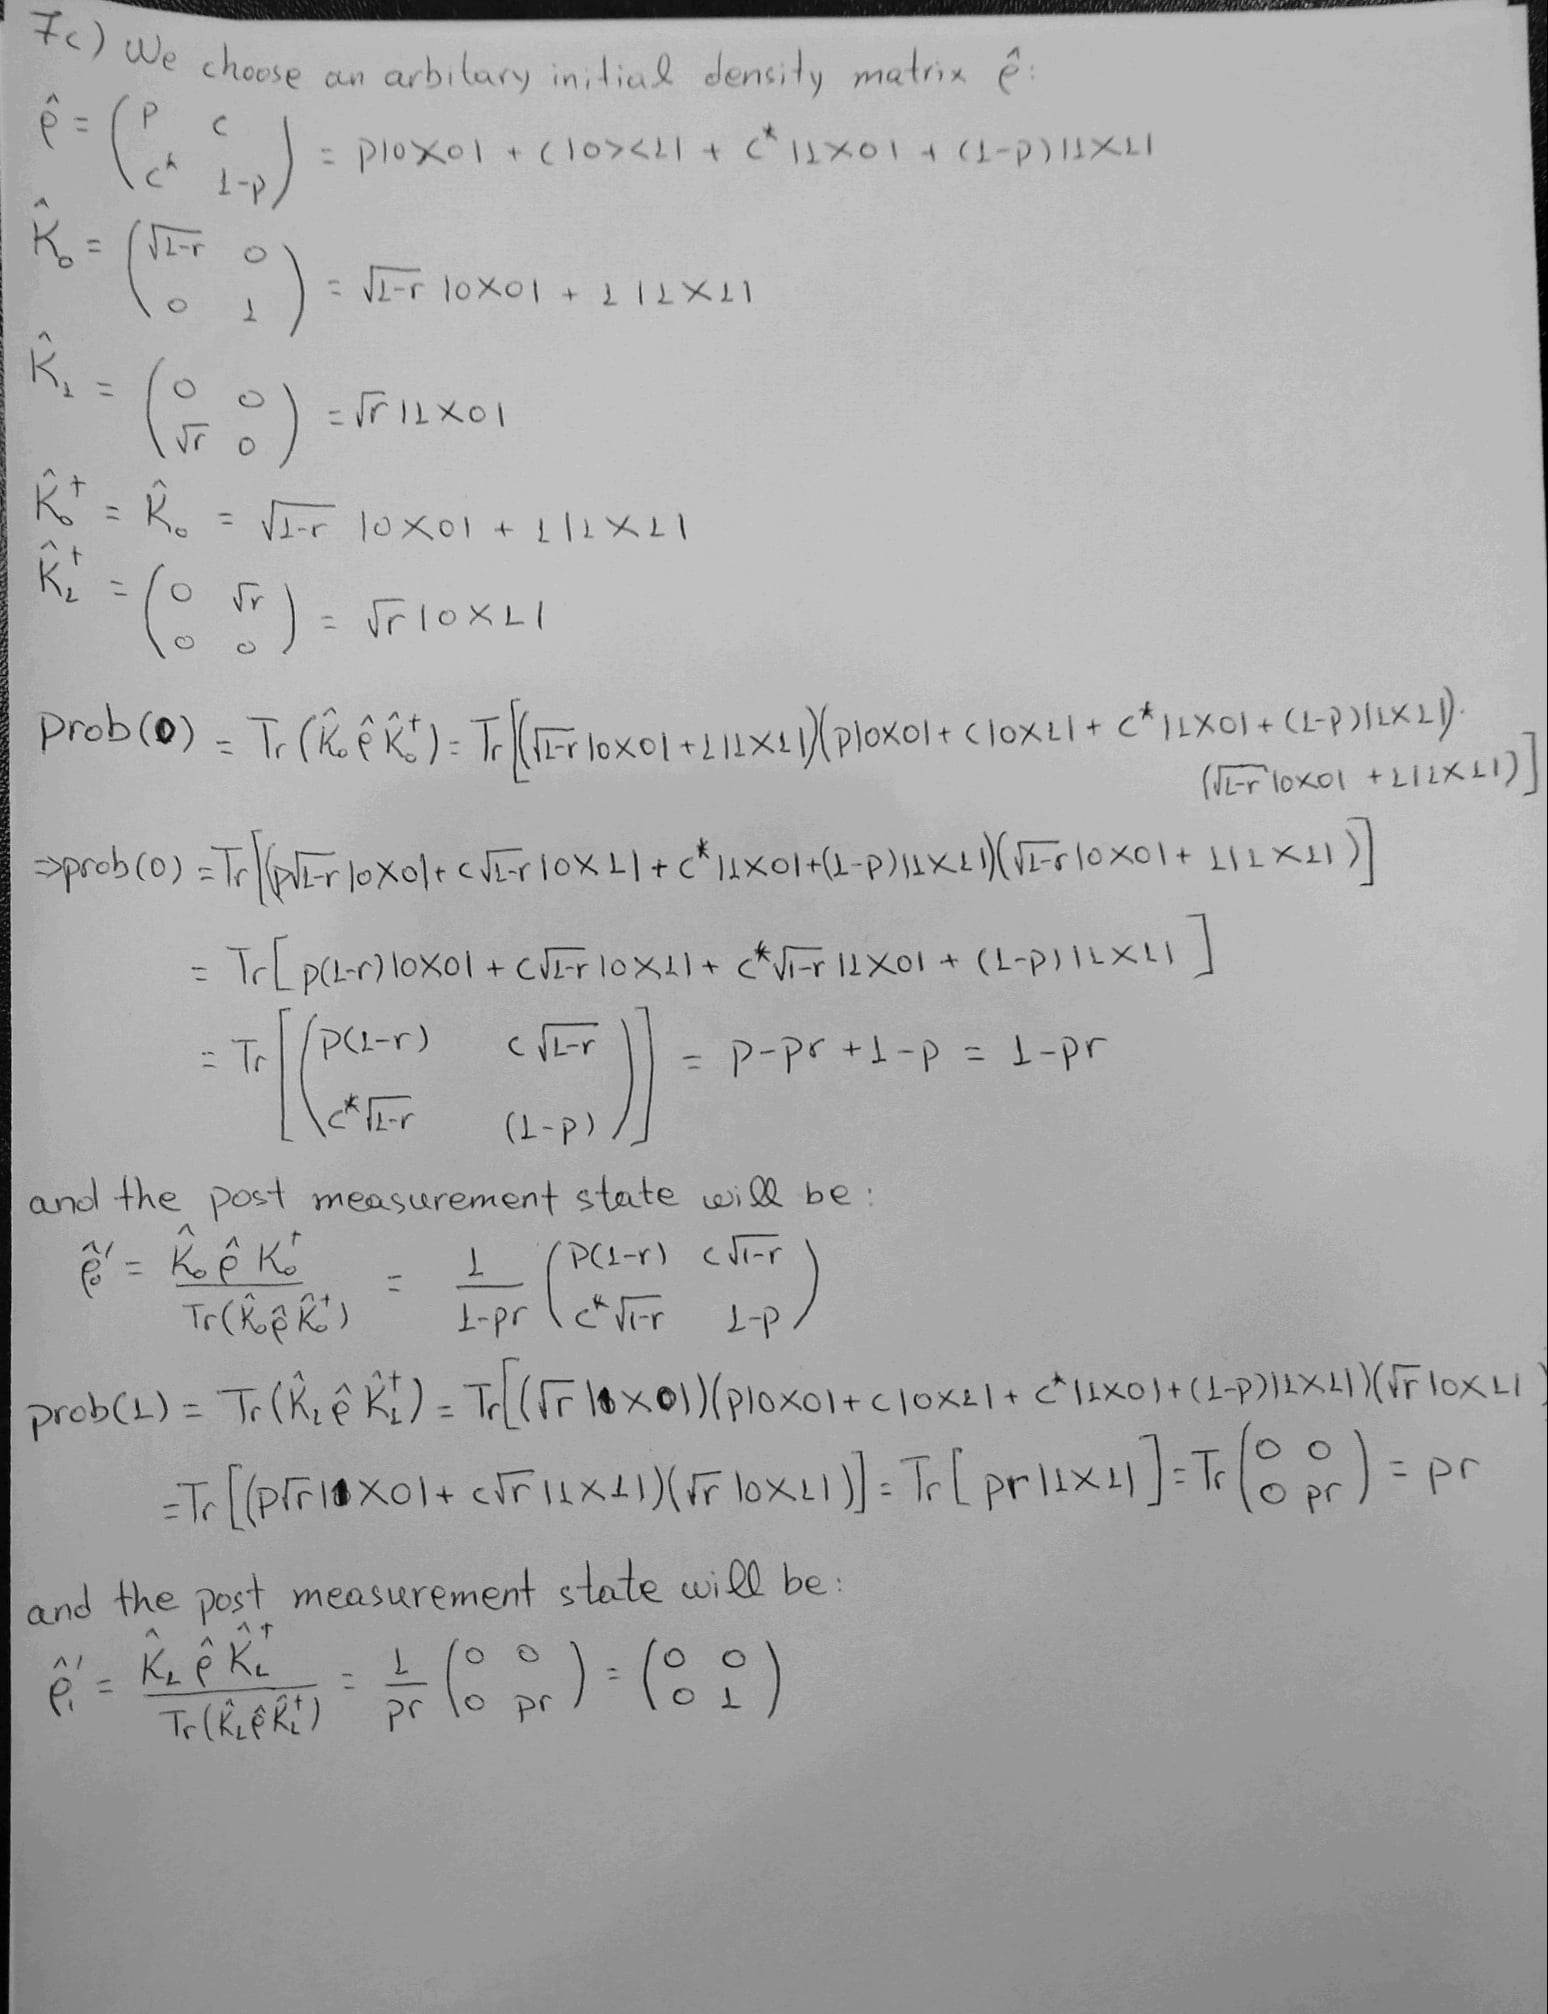

(d) Now consider the generalised measurement defined by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$
As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

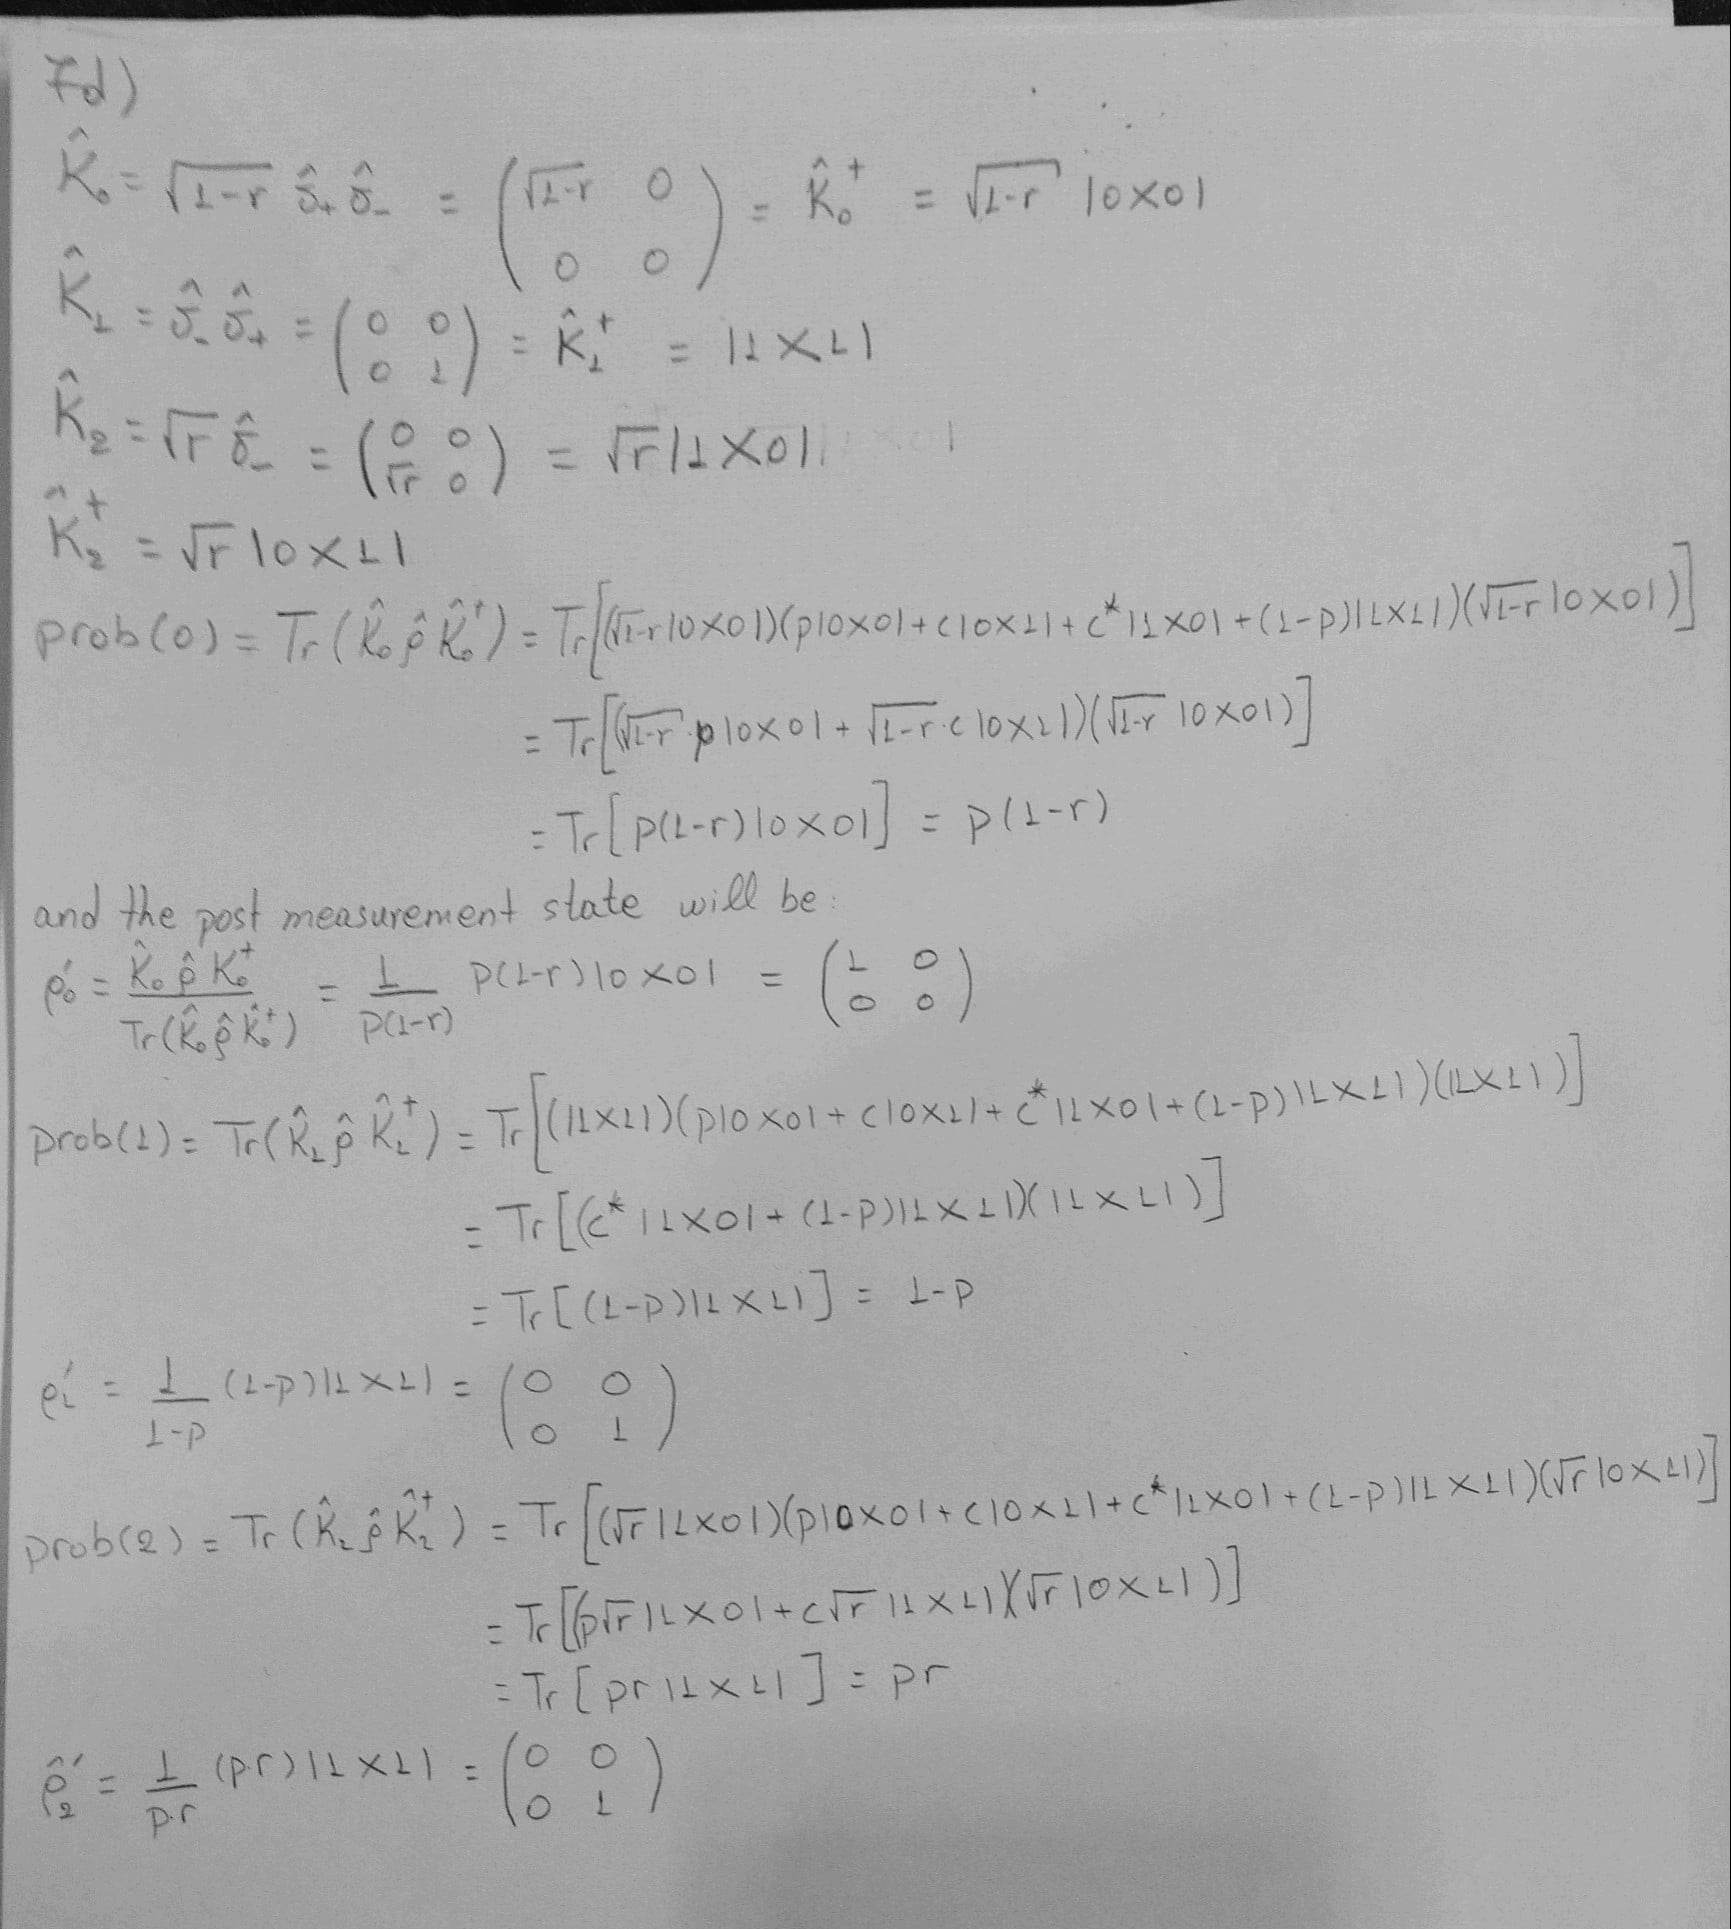

## 8. 
(a) The partial trace over one qubit of a two-qubit system is defined by

$$ \hat{\rho}_A = {\rm tr}_B ( \hat{\rho}) = \sum_{j=0}^1 \langle b_j| \hat{\rho}|b_j\rangle = \sum_{j=0}^1 (\hat{\mathbb{1}}_A\otimes\langle b_j|) \hat{\rho}(\hat{\mathbb{1}}_A\otimes| b_j\rangle), $$

where $\{|b_j\rangle\}$ is any orthonormal basis in the Hilbert space of qubit $B$. Assume that $|b_{0}\rangle = |0\rangle$ and $|b_1\rangle = |1\rangle$ are the computational basis states. Construct the Kraus operators describing the above CPTP map. Verify numerically that the Kraus operators obey the completeness relation required for a CPTP map.

In [183]:
#basis
b0 = np.array([[1,0]])
b1 = np.array([[0,1]])

#Kraus operators
K0 = np.kron(np.eye(2),b_0)
K1 = np.kron(np.eye(2),b_1)

# verification of completeness relation in order for Krauss operators to consist a CPTP map. K_sum must be equal to the identity
K_sum = (K0.conj().T)@K0 + (K1.conj().T)@K1
print(K_sum)
print('indeed this is the identity matrix')

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
indeed this is the identity matrix


(b) Now consider again the two-qubit problem described by the Hamiltonian

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z,$$

which we saw in question 8 of Worksheet 1. Simulate the dynamics starting from the pure state $|\psi(0)\rangle = |10\rangle$. Use the parameters $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$, and simulate up to a time $Jt = 20$. (You can either re-use your solution from Worksheet 1, or adapt the code from the solution provided.) Compute the reduced density matrix of qubit $A$ and plot its purity, $P = {\rm tr}(\hat{\rho}_A^2)$, as a function of time.

In [198]:
# Define a function for iteratively carrying out unitary time evolution, with U_dt the evolution operator over
# one timestep, initial state psi_0, total evolution time t_tot, timestep dt, and obs a list of observables
def time_evo(U_dt, psi_0, t_tot, dt, obs):
    
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    n_obs = len(obs)         # Number of observables to compute at each timestep
    psi,t = psi_0, 0.0       # Initial state and time
    t_axis, obs_exp = np.zeros(n_steps+1), np.zeros([n_obs,n_steps+1]) # Time axis and observable expectation values
                                                                       # (n_steps+1 includes t=0) 
    psi_1 = np.zeros([n_steps+1,4,1])                                              
    # Loop over timesteps
    for ii in range(n_steps):
        
        # Compute and store expectation values
        t_axis[ii] = t
        for jj in range(n_obs):
            this_obs = np.vdot(psi,obs[jj]@psi)
            obs_exp[jj,ii] = np.real(this_obs)
        
        # Take a step forward in time
        psi = U_dt@psi
        psi_1[ii,:] = np.array(psi)
        t += dt
    
    # Compute and store final expectation values
    t_axis[ii+1] = t
    for jj in range(n_obs):
        this_obs = np.vdot(psi,obs[jj]@psi)
        obs_exp[jj,ii+1] = np.real(this_obs)
    
    return t_axis, obs_exp, psi, psi_1
#i used the function from first worksheet's solutions

/var/folders/fr/p1j_16v5509589zqnf_6g6_40000gn/T/ipykernel_77951/4263252954.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_1[ii,:] = np.array(psi)


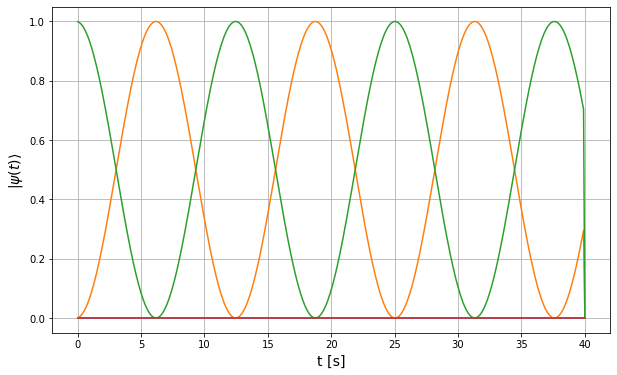

In [201]:
#Pauli matrices
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

# Parameteres
𝜔_A = 𝜔_B = 1
J = V = 0.5*𝜔_A


iden = np.eye(2)#identity     

#hamiltonian
def Hamiltonian(𝜔_A,𝜔_B,J,V):
    H = -(𝜔_A/2)*np.kron(sz,iden) - (𝜔_B/2)*np.kron(iden,sz) + (J/4)*(np.kron(sx,sx) + \
np.kron(sy,sy)) + (V/2)*np.kron(sz,sz)
    return H

#total time and evolution
t_tot, dt = 40, 0.1 
U_dt = expm(-1j*Hamiltonian(𝜔_A,𝜔_A,J,V)*dt)


# Initial state 
zero, one = np.array([[1],[0]]),np.array([[0],[1]]) 
psi_0 = np.kron(one,zero)

#Simulating for initial pure state 
t_axis, [Z], psi, psi_1 = time_evo(U_dt, psi_0, t_tot, dt, [np.kron(sigma_z,iden)])

t = np.arange(0,t_tot+dt,dt)



plt.figure(figsize = (10,6))
plt.plot(t,psi_1[:,:,0])
plt.xlabel('t [s]',fontsize = 14), plt.ylabel('|$\\psi(t)\\rangle$', fontsize = 14)
plt.grid()

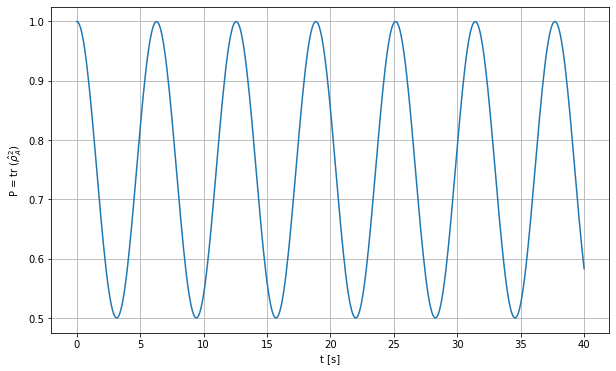

In [207]:
#Reduced density matrix 
rhoA = psi_0@psi_0.T
# Purity array
P = np.zeros(len(t))

for i in range(len(t)):
    
    # Unitary Operator
    U_t = expm(-1j*Hamiltonian(𝜔_A,𝜔_A,J,V)*t[i])

    #computing the purities
    purity = np.zeros(len(t))

    #Time-dependent density matrix
    rho_t = U_t@rhoA@U_t.conj().T
    
    # Partial Trace
    partial_t = K0@rho_t@(K0.T) + K1@rho_t@(K1.T)
    
    # Purity
    P[i] = (np.trace(partial_t@partial_t)).real


    
plt.figure(figsize =(10,6))
plt.plot(t,P)
plt.ylabel('P = tr ($\\hat{\\rho}_{A}^2$) ')
plt.xlabel('t [s]')
plt.grid()

(c) Repeat the purity calculation of part (b) but with the parameters $\omega_A = 2\omega_B$ and $J=V=0.5\omega_A$. Comment on the differences between the results of (b) and (c).

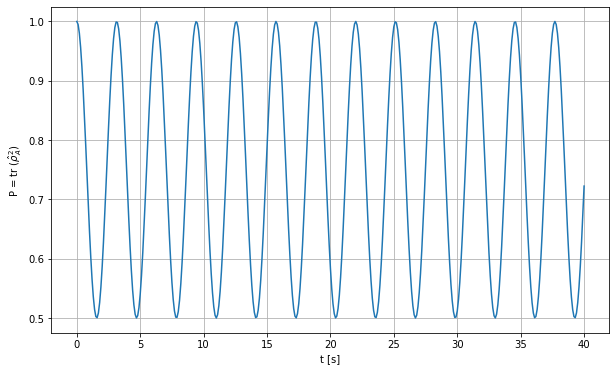

In [210]:
𝜔_B = 1
𝜔_A = 2*𝜔_B
J = V = 0.5*𝜔_A

# Purity array
P1 = np.zeros(len(t))

for i in range(len(t)):
    
    # Unitary Operator
    U_t = expm(-1j*Hamiltonian(𝜔_A,𝜔_A,J,V)*t[i])

    #computing the purities
    purity = np.zeros(len(t))

    #Time-dependent density matrix
    rho_t = U_t@rhoA@U_t.conj().T
    
    # Partial Trace
    partial_t = K0@rho_t@(K0.T) + K1@rho_t@(K1.T)
    
    # Purity
    P1[i] = (np.trace(partial_t@partial_t)).real

plt.figure(figsize =(10,6))
plt.plot(t,P1)
plt.ylabel('P = tr ($\\hat{\\rho}_{A}^2$) ')
plt.xlabel('t [s]')
plt.grid()

In [ ]:
#When we have an increase of the drive frequency we observe that the purity oscillates faster and we see
#the maximally entangled states(P=0.5) more frequently. Specifically we observe maximally entangled states two
#times over every 5 second instead of one time every 5 seconds that we observed in the first case.